# Diabetes Health Indicators **Dataset**

## Dataset Explanation
<!-- 1. ID	(Patient ID - Mã số ) : (Integer) -->
1. Diabetes_012	(Diabetes - Mác bệnh tiểu đường ) (CLassification):	0 = No diabetes , 1 = Prediabetes , 2 = Diabetes (Integer)
2. HighBP	(High blood pressure - Huyét áp cao ) :	0 = No , 1 = Yes (Binary)
3. HighChol	(High cholesterol - cholesterol cao ) :	0 = No , 1 = Yes (Binary)
4. CholCheck (Cholesterol Check in 5 years - Đã kiểm tra cholesterol trong 5 năm ) :	0 = No , 1 = Yes (Binary)
5. BMI ( Body Mass Index -Chỉ số cơ thể ) :(Integer)
6. Smoker ( Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] - Đã từng hút thuốc ít nhất 100 điếu [5 gói =100 diếu ] chưa (tính đến hiện tại )) :	0 = No , 1 = Yes (Binary)
7. Stroke ((Ever told) you had a stroke - Đã từng bị đột quỵ chưa ?) :	0 = No , 1 = Yes (Binary)
8. HeartDiseaseorAttack (coronary heart disease (CHD) or myocardial infarction (MI) - Có bệnh Tim mạch vành hoặc nhồi máu cơ tim  ) : 0 = No, 1 = Yes (Binary)
9. PhysActivity (Physical activity in past 30 days - not including job -Hoạt động thể chất trong 30 ngày qua) : 0 = No, 1 = Yes (Binary)
10. Fruits (Consume Fruit 1 or more times per day -Tiêu thụ trái cây ít nhất 1 lần/ngày) : 0 = No, 1 = Yes (Binary)
11. Veggies (Consume Vegetables 1 or more times per day -Tiêu thụ rau cải ít nhất 1 lần/ngày): 0 = No, 1 = Yes (Binary)
12. HvyAlcoholConsump (Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) - Tiêu thụ rượu nặng) : 0 = No, 1 = Yes (Binary)
13. AnyHealthcare (Have any kind of health care coverage, including health insurance, prepaid plans such as HMO - Có bảo hiểm y tế): 0 = No, 1 = Yes (Binary)
14. NoDocbcCost (Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? - Không đi khám bác sĩ do chi phí) : 0 = No, 1 = Yes (Binary)
15. GenHlth (Would you say that in general your health is scale 1-5 1 -Tình trạng sức khỏe tổng quan) : 1 = excellent , 2 = very good , 3 = good , 4 = fair , 5 = poor (Integer)
16. MentHlth (Mental health in  past 30 days - Tình trạng tâm lý trong 30 ngày qua) : Số nguyên (Integer)
17. PhysHlth (Physical health in the past 30 days - Tình trạng sức khỏe trong 30 ngày qua) : Số nguyên (Integer)
18. DiffWalk (Do you have serious difficulty walking or climbing stairs? - Khó khăn khi đi bộ hoặc leo cầu thang) : 0 = No, 1 = Yes (Binary)
19. Sex (Sex - Giới tính) : 0 = Female, 1 = Male (Binary)
20. Age (Age - Tuổi) : Số nguyên (Integer)
21. Education (Education level (EDUCA see codebook) scale 1-6 - Trình độ học vấn) : 1 = Never attended school or only kindergarten , 2 = Grades 1 through 8 (Elementary) , 3 = Grades 9 through 11 (Some high school)  , 4 = Grade 12 or GED (High school graduate) , 5 = College 1 year to 3 years (Some college or technical school) , 6 = College 4 years or more (College graduate) (Integer)
22. Income (Income scale (INCOME2 see codebook) scale 1-8 - Thu nhập) : 1 = less than $10,000 , 5 = less than $35,000  , 8 = $75,000 or more (Integer)









In [1]:
# Cài đặt thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve,accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz,export_text
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import graphviz
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
import math
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Đọc dữ liệu

In [2]:
#kết nối gg drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Đọc dữ liệu từ gg drive
df = pd.read_csv('/content/drive/MyDrive/Data_Mining/diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
# hiển thị dữ liệu 5 dòng đầu
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Mô tả dữ liệu
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Hiển thị số lượng dữ liệu và thuộc tính
df.shape

(253680, 22)

In [ ]:
# Hiển thị thông tin sơ bộ từng thuộc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Hiển thị số lượng các lớp chính
df['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [ ]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
# Đém số lượng giá trị cuả từng giá trị thuộc tính
for i in df.columns:
    print(i,'\n',df[i].value_counts())
    print('-'*90)

Diabetes_012 
 0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64
------------------------------------------------------------------------------------------
HighBP 
 0.0    144851
1.0    108829
Name: HighBP, dtype: int64
------------------------------------------------------------------------------------------
HighChol 
 0.0    146089
1.0    107591
Name: HighChol, dtype: int64
------------------------------------------------------------------------------------------
CholCheck 
 1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
------------------------------------------------------------------------------------------
BMI 
 27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
------------------------------------------------------------------------------------------
Smoker 
 0.0    141257
1.0    112423
Name: Smoker, dtype:

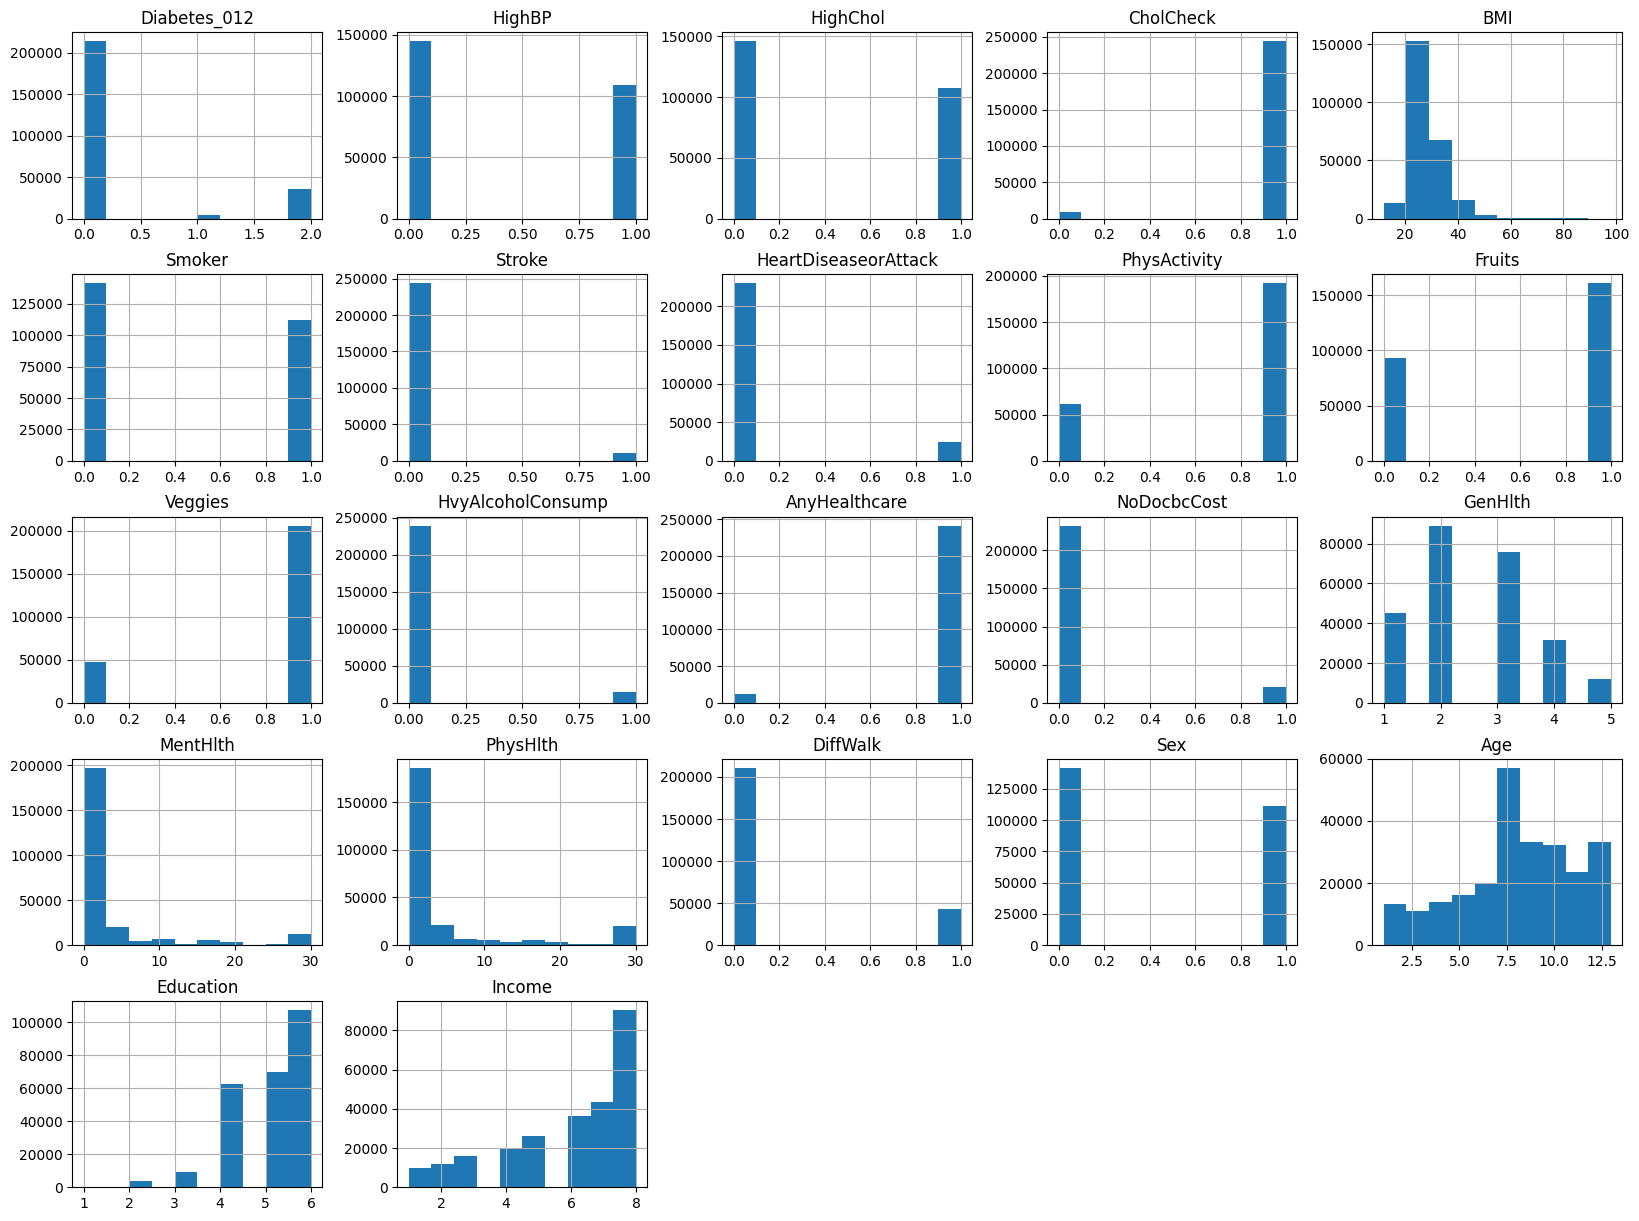

In [ ]:
#using histogram to understand dataset data better

df.hist(figsize=(20,15));

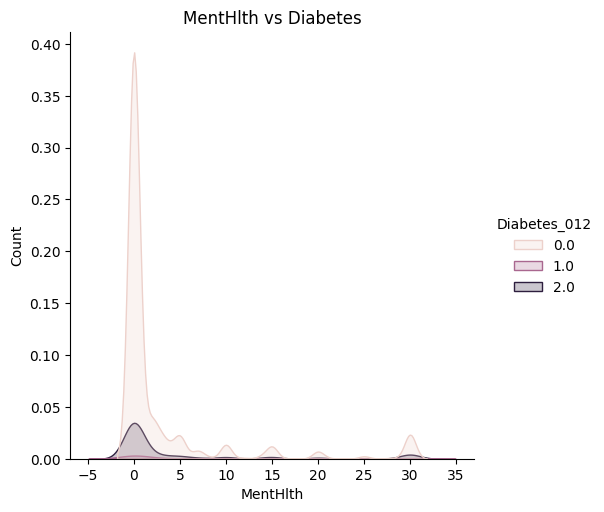

In [ ]:
# MentHlth and Diabetes
sns.displot(df, x="MentHlth", hue="Diabetes_012", kind="kde", fill=True)
plt.title('MentHlth vs Diabetes')
plt.xlabel('MentHlth')
plt.ylabel('Count')
plt.show()

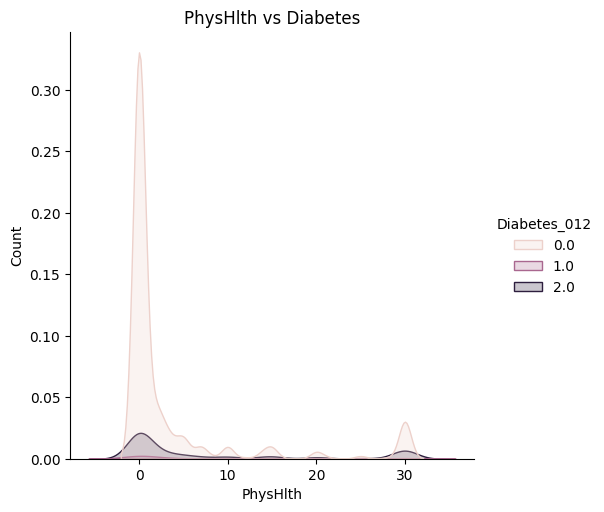

In [ ]:
# PhysHlth and Diabetes
sns.displot(df, x="PhysHlth", hue="Diabetes_012", kind="kde", fill=True)
plt.title('PhysHlth vs Diabetes')
plt.xlabel('PhysHlth')
plt.ylabel('Count')
plt.show()

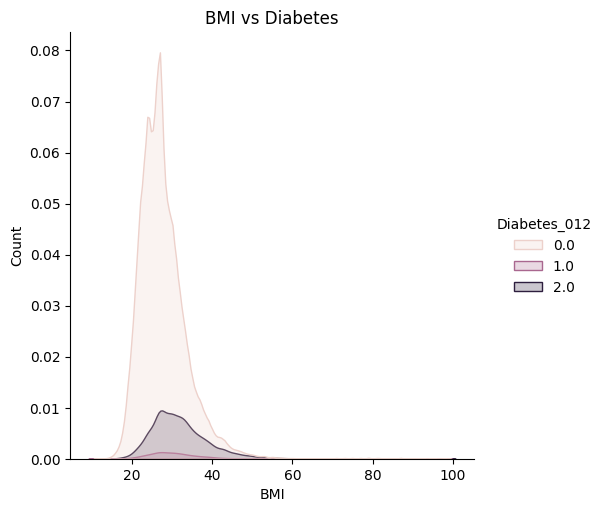

In [ ]:
# BMI and Diabetes
sns.displot(df, x="BMI", hue="Diabetes_012", kind="kde", fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

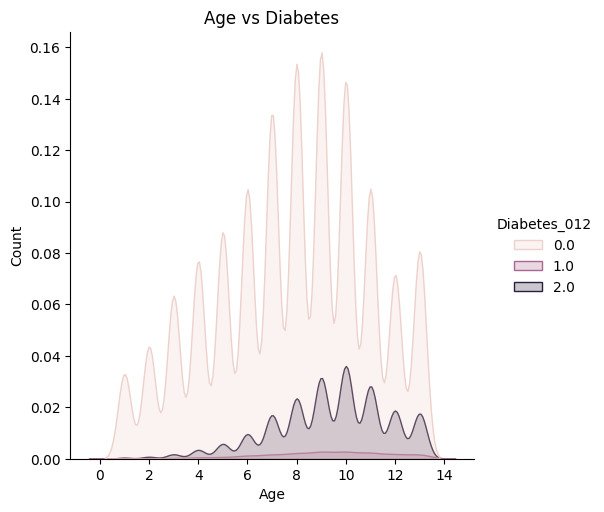

In [ ]:
# MentHlth and Diabetes
sns.displot(df, x="Age", hue="Diabetes_012", kind="kde", fill=True)
plt.title('Age vs Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Biểu đồ cho thấy mối liên quan giữa tuổi và bệnh tiểu đường . Những người cao tuổicó nguy cơ mắc bệnh tiểu đường cao

In [4]:
data = df.copy()

In [5]:
# Định nghĩa khoảng giá trị
bins = [0, 3, 6, 13]

# Sử dụng phương thức cut để phân loại các giá trị Age vào các nhóm
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=["0", "1", "2"])

chia tuổi thành 3 nhóm 0: 18-34 tuổi , 1 : 35-50 , 2: 50 - 80

In [6]:

# Định nghĩa khoảng giá trị từ 15 đến 55
bins = [11, 20,50,99]
# Định nghĩa khoảng giá trị

# Sử dụng phương thức cut để phân loại các giá trị Age vào các nhóm
data['BMI_Group'] = pd.cut(data['BMI'], bins=bins, labels=["0", "1","2"])


Chia BMI thành 3 nhóm 0: 12-20 ,1: 21-50 , 2: 51-98

In [7]:
bins = [-1, 5,30]
# Định nghĩa khoảng giá trị

# Sử dụng phương thức cut để phân loại các giá trị Age vào các nhóm
data['MentHlth_Group'] = pd.cut(data['MentHlth'], bins=bins, labels=["0", "1"])

Chia MentHlth thành 2 nhóm 0: 0-5  , 1: 6-30

In [8]:
bins = [-1, 10,30]
# Định nghĩa khoảng giá trị

# Sử dụng phương thức cut để phân loại các giá trị Age vào các nhóm
data['PhysHlth_Group'] = pd.cut(data['PhysHlth'], bins=bins, labels=["0", "1"])

Chia PhysHlth thành 2 nhóm 0: 0-10  , 1: 11-30

In [9]:
data1 = data.copy()

In [ ]:
columns_to_drop = ['BMI', 'PhysHlth','MentHlth','Age']

In [ ]:
data1 = data1.drop(columns=columns_to_drop, axis=1)

### Biểu diễn sự tương quan giữa các dữ liệu

In [ ]:
# Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Hiển thị ma trận tương quan
print(correlation_matrix)

                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.271596  0.209085   0.067546  0.224379   
HighBP                    0.271596  1.000000  0.298199   0.098508  0.213748   
HighChol                  0.209085  0.298199  1.000000   0.085642  0.106722   
CholCheck                 0.067546  0.098508  0.085642   1.000000  0.034495   
BMI                       0.224379  0.213748  0.106722   0.034495  1.000000   
Smoker                    0.062914  0.096991  0.091299  -0.009929  0.013804   
Stroke                    0.107179  0.129575  0.092620   0.024158  0.020153   
HeartDiseaseorAttack      0.180272  0.209361  0.180765   0.044206  0.052904   
PhysActivity             -0.121947 -0.125267 -0.078046   0.004190 -0.147294   
Fruits                   -0.042192 -0.040555 -0.040859   0.023849 -0.087518   
Veggies                  -0.058972 -0.061266 -0.039874   0.006121 -0.062275   
HvyAlcoholConsump        -0.057882 -0.003972 -0.0115

Text(0.5, 1.0, 'Correlation Heatmap')

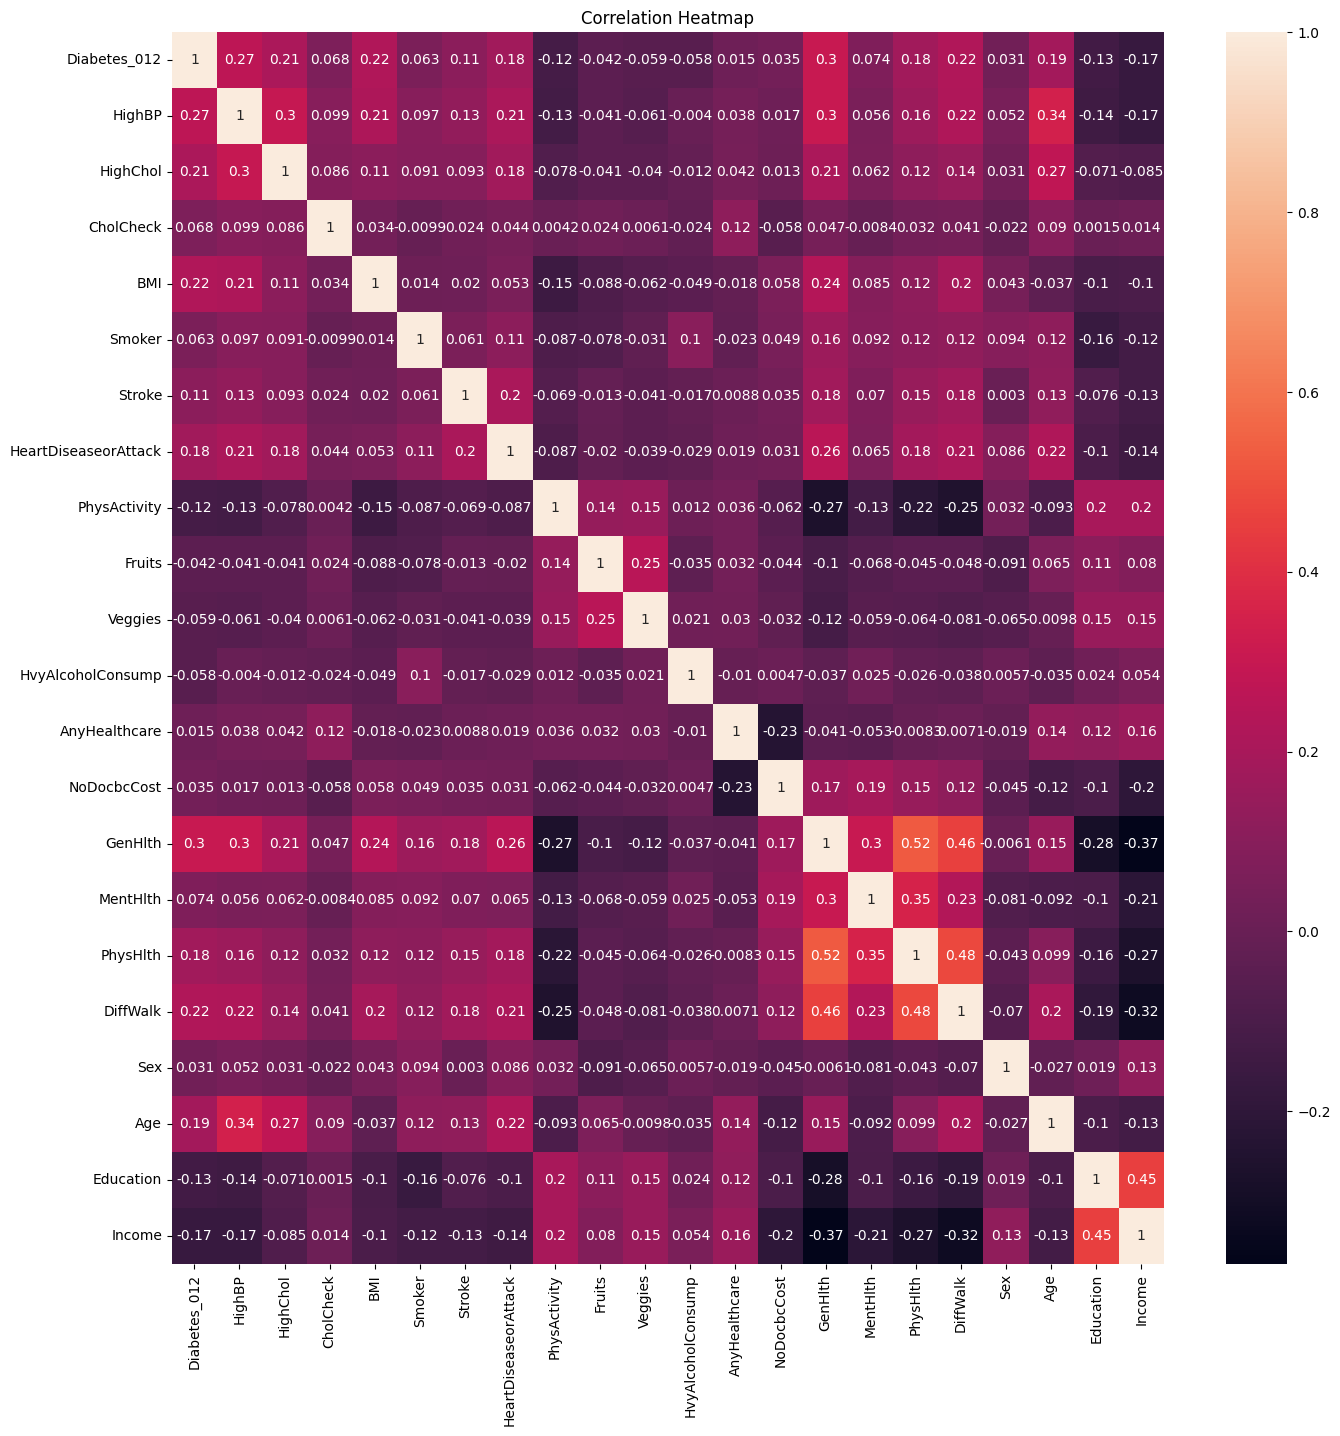

In [ ]:
# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')

Kiểm tra biểu đồ tương quan heatmap .Ta thấy GenHth là thuộc tính ảnh hưởng nhất đổi bệnh tiểu đường


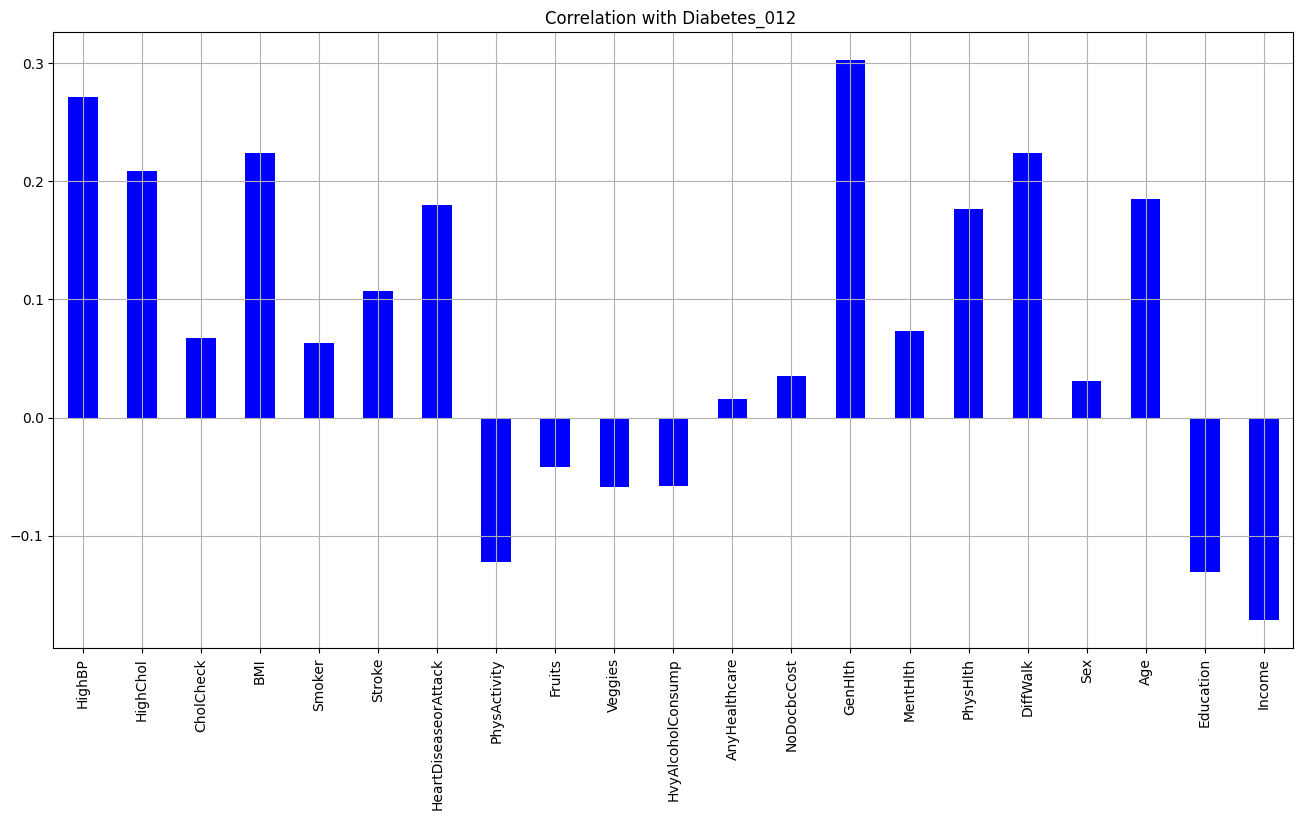

In [ ]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(16, 8)
, title="Correlation with Diabetes_012 ",color="Blue");

Biểu đồ cột biểu diẽn mức độ ảnh hưởng của các thuộc tính đối với lớp

In [ ]:
data1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education', 'Income', 'Age_Group', 'BMI_Group',
       'MentHlth_Group', 'PhysHlth_Group'],
      dtype='object')

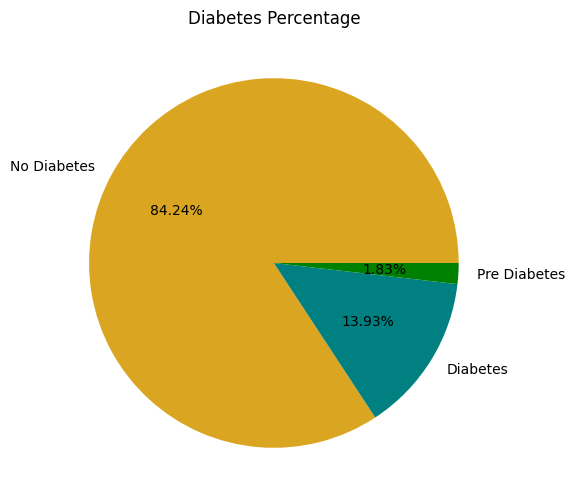

In [ ]:
# Vẽ biểu đồ hình tròn biểu diễn tỉ lệ phần trăm về Diabetes
plt.figure(figsize=(10,6))
plt.pie(df['Diabetes_012'].value_counts(), labels=['No Diabetes', 'Diabetes','Pre Diabetes'], autopct='%1.2f%%', colors=['goldenrod', 'teal','green'])
plt.title('Diabetes Percentage')
plt.show()

In [ ]:
columns_to_plot = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
                   'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
                   'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                   'NoDocbcCost', 'GenHlth',  'DiffWalk',
                   'Sex', 'Education', 'Income', 'Age_Group', 'BMI_Group',
                   'MentHlth_Group', 'PhysHlth_Group']

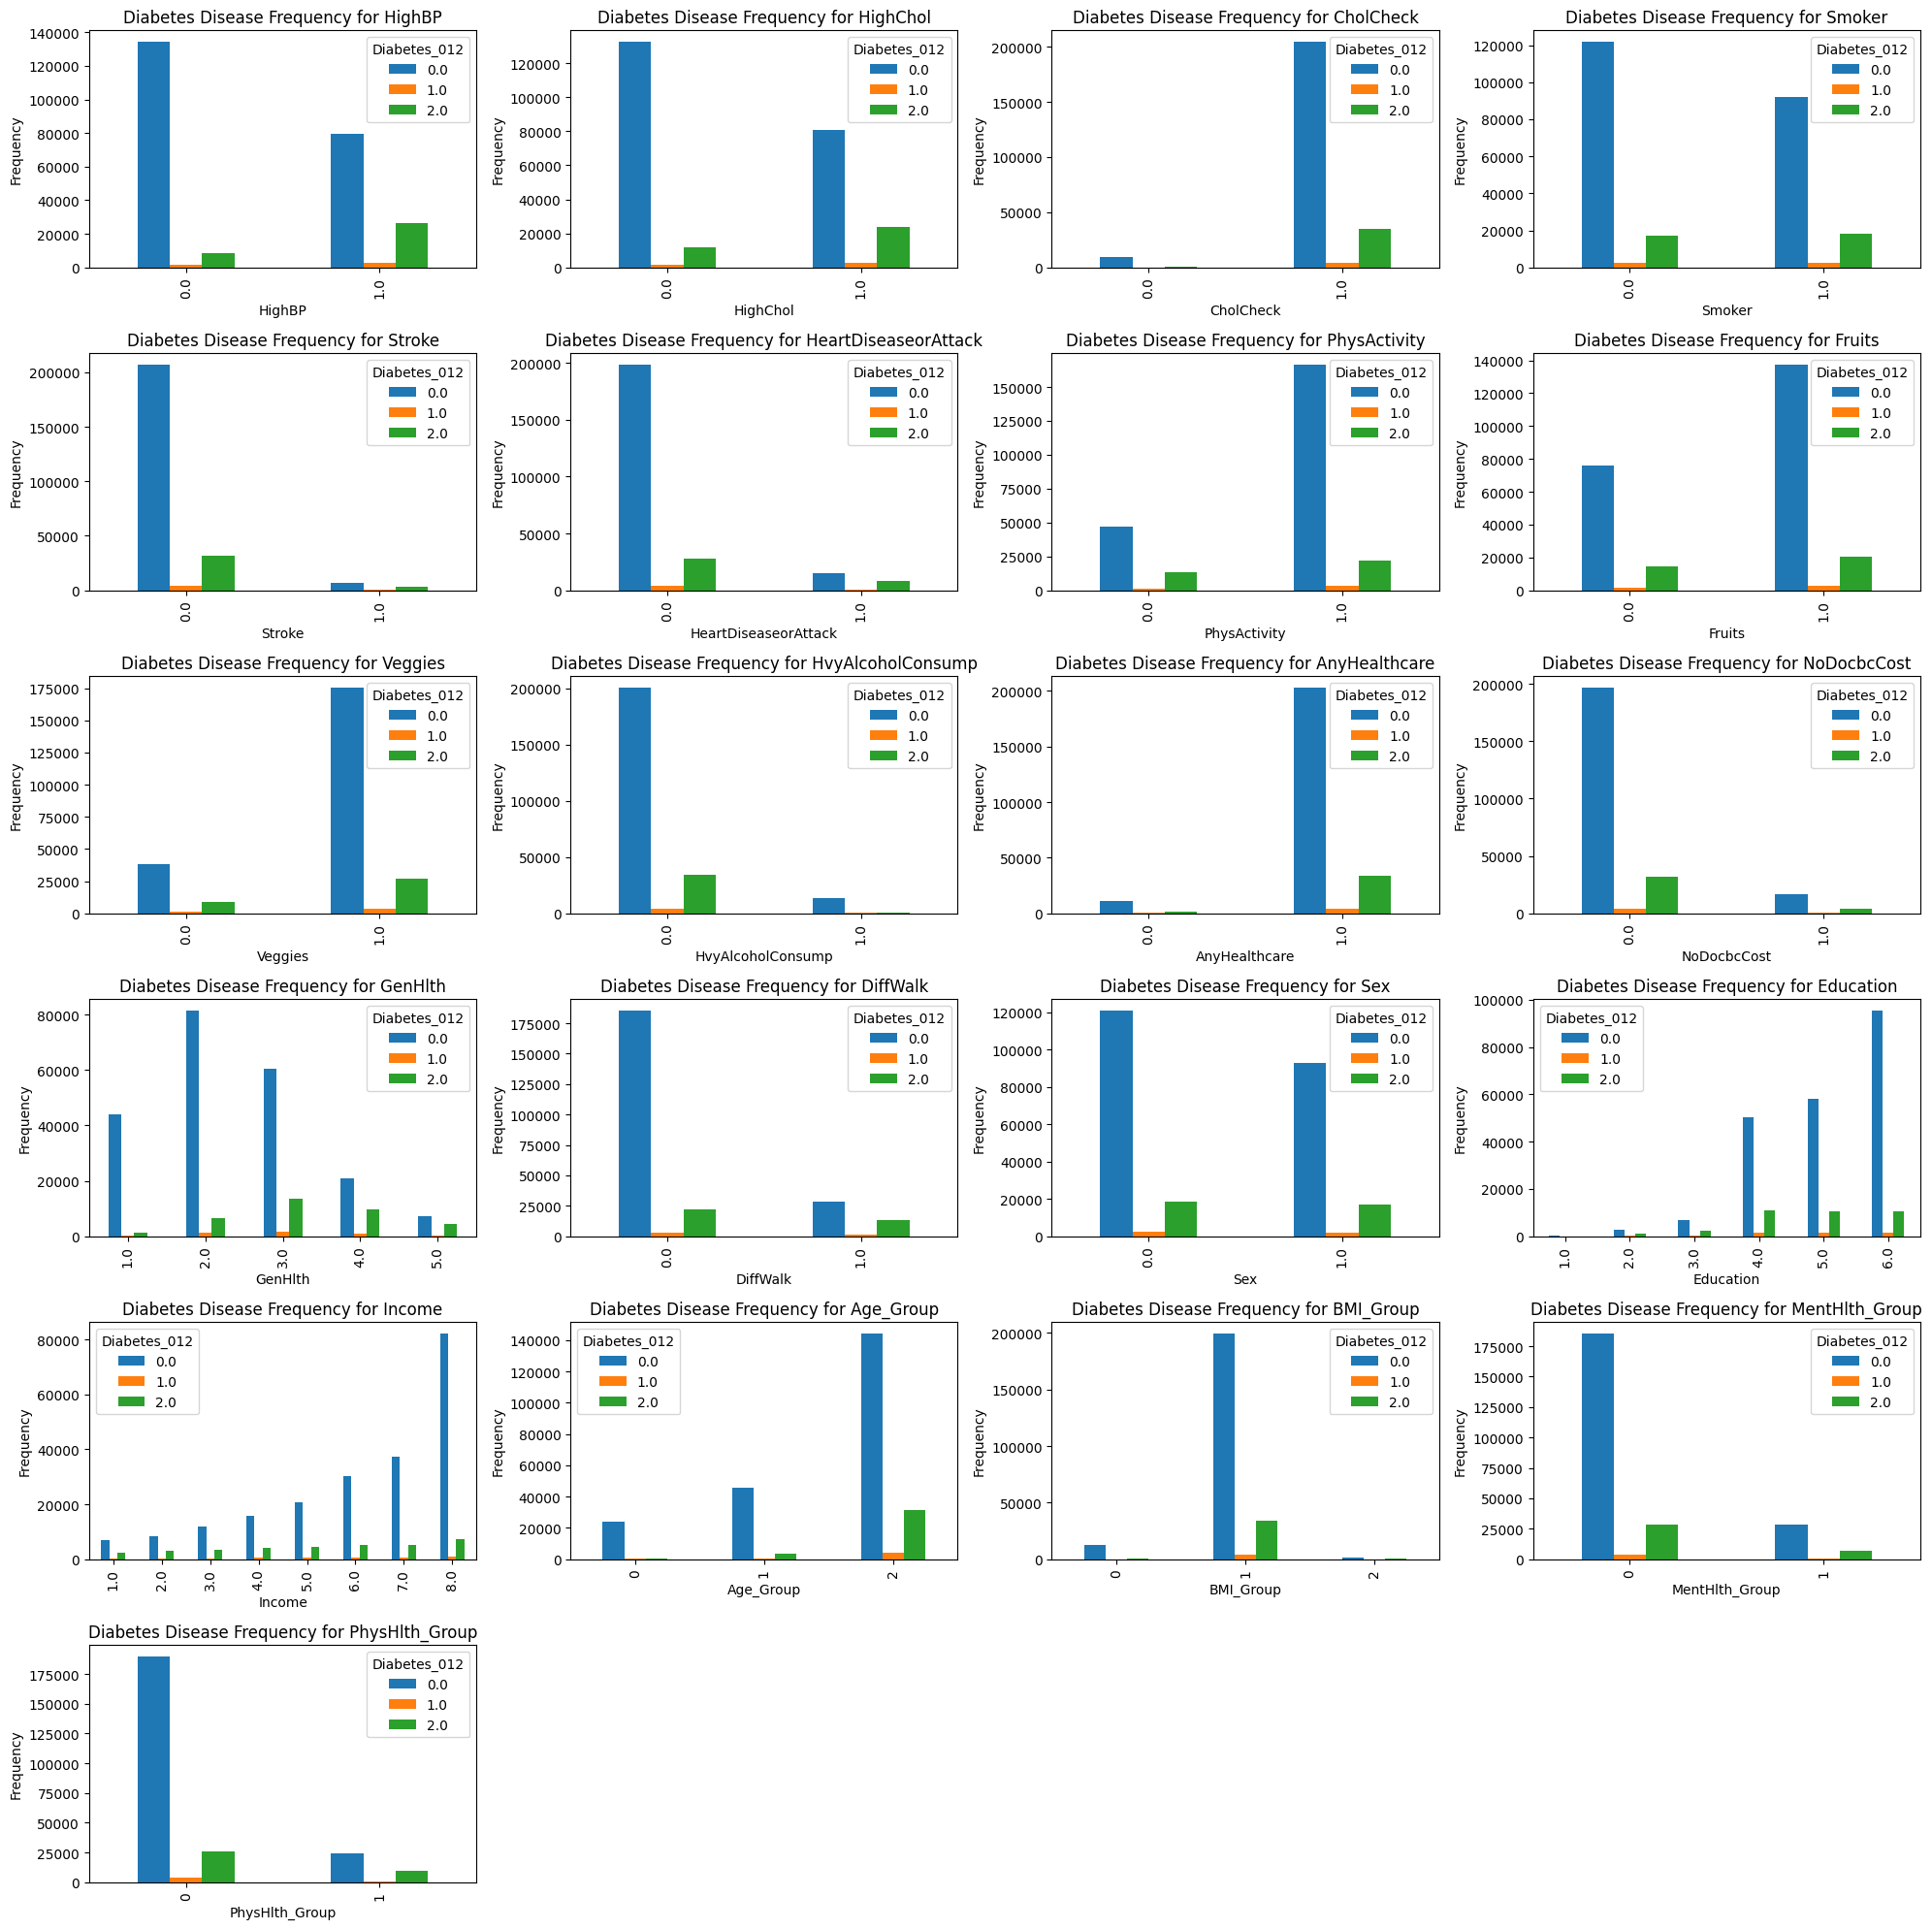

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Số cột tối đa trên mỗi hàng
cols_per_row = 4
# Số cột trên mỗi hàng
num_rows = len(columns_to_plot) // cols_per_row
if len(columns_to_plot) % cols_per_row != 0:
    num_rows += 1

# Tạo lưới biểu đồ
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 20))

# Vòng lặp để vẽ các biểu đồ cột và sắp xếp chúng
for i, col in enumerate(columns_to_plot):
    row = i // cols_per_row
    col_num = i % cols_per_row

    crosstab_result = pd.crosstab(data1[col], data1['Diabetes_012'])
    ax = axes[row, col_num]

    crosstab_result.plot(kind="bar", ax=ax)
    ax.set_title(f'Diabetes Disease Frequency for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Loại bỏ các trục trống
for i in range(len(columns_to_plot), num_rows * cols_per_row):
    fig.delaxes(axes.flatten()[i])

# Tinh chỉnh layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()



In [ ]:
# Các cột bạn muốn tính toán tỷ lệ

columns_to_calculate = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth' , 'DiffWalk', 'Sex', 'Age_Group', 'Education', 'Income','BMI_Group','MentHlth_Group','PhysHlth_Group']


In [ ]:

# Lặp qua từng cột và thực hiện tính toán tỷ lệ
for col in columns_to_plot:
    cross_tab = pd.crosstab(data1[col], data1['Diabetes_012'], normalize='index')

    # Tính tỉ lệ của mỗi giá trị trong bảng tần số chéo so với tổng
    for i in cross_tab.index:
        for j in cross_tab.columns:
            cross_tab.loc[i, j] = round(cross_tab.loc[i, j] / cross_tab.sum(axis=1)[i], 2)

    print(f"Tỉ lệ cho cột {col}: \n{cross_tab}\n")

Tỉ lệ cho cột HighBP: 
Diabetes_012   0.0   1.0   2.0
HighBP                        
0.0           0.93  0.01  0.06
1.0           0.73  0.03  0.24

Tỉ lệ cho cột HighChol: 
Diabetes_012   0.0   1.0   2.0
HighChol                      
0.0           0.91  0.01  0.08
1.0           0.75  0.03  0.22

Tỉ lệ cho cột CholCheck: 
Diabetes_012   0.0   1.0   2.0
CholCheck                     
0.0           0.97  0.01  0.03
1.0           0.84  0.02  0.14

Tỉ lệ cho cột Smoker: 
Diabetes_012   0.0   1.0   2.0
Smoker                        
0.0           0.86  0.02  0.12
1.0           0.82  0.02  0.16

Tỉ lệ cho cột Stroke: 
Diabetes_012   0.0   1.0   2.0
Stroke                        
0.0           0.85  0.02  0.13
1.0           0.66  0.03  0.32

Tỉ lệ cho cột HeartDiseaseorAttack: 
Diabetes_012           0.0   1.0   2.0
HeartDiseaseorAttack                  
0.0                   0.86  0.02  0.12
1.0                   0.64  0.03  0.33

Tỉ lệ cho cột PhysActivity: 
Diabetes_012   0.0   1.0   2.0
P

In [ ]:
for attribute in columns_to_plot:
    print(f"Thuộc tính {columns_to_plot}:")
    for class_label in [0, 1, 2]:
        df_class = data1[data1['Diabetes_012'] == class_label]
        values = df_class[columns_to_plot].value_counts(normalize=True)
        print(f"Lớp {class_label}:")
        print(values)
    print("\n")

Thuộc tính ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Age_Group', 'BMI_Group', 'MentHlth_Group', 'PhysHlth_Group']:
Lớp 0:
HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  DiffWalk  Sex  Education  Income  Age_Group  BMI_Group  MentHlth_Group  PhysHlth_Group
0.0     0.0       1.0        0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          1.0      0.0       0.0  6.0        8.0     2          1          0               0                 0.005966
                                                                                                                                                                                            1          1  

In [ ]:
# Vòng lặp để kiểm tra từng cột
for column in columns_to_plot:
    results = (data1.groupby("Diabetes_012")[column].value_counts() / data1.groupby("Diabetes_012")[column].count()) * 100
    print(f"Tỉ lệ cho cột {column}:")
    print(results)
    print("\n")

Tỉ lệ cho cột HighBP:
Diabetes_012  HighBP
0.0           0.0       62.886810
              1.0       37.113190
1.0           1.0       62.902181
              0.0       37.097819
2.0           1.0       75.267357
              0.0       24.732643
Name: HighBP, dtype: float64


Tỉ lệ cho cột HighChol:
Diabetes_012  HighChol
0.0           0.0         62.082891
              1.0         37.917109
1.0           1.0         62.081624
              0.0         37.918376
2.0           1.0         67.011826
              0.0         32.988174
Name: HighChol, dtype: float64


Tỉ lệ cho cột CholCheck:
Diabetes_012  CholCheck
0.0           1.0          95.710402
              0.0           4.289598
1.0           1.0          98.661196
              0.0           1.338804
2.0           1.0          99.318169
              0.0           0.681831
Name: CholCheck, dtype: float64


Tỉ lệ cho cột Smoker:
Diabetes_012  Smoker
0.0           0.0       57.031956
              1.0       42.968044
1.0       

### Tiền xử lý dữ liệu

In [ ]:
# Kiểm tra giá trị thiếu
missing_values = data1.isnull().sum()
print(missing_values)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
DiffWalk                0
Sex                     0
Education               0
Income                  0
Age_Group               0
BMI_Group               0
MentHlth_Group          0
PhysHlth_Group          0
dtype: int64


In [ ]:
# Kiểm tra dữ liệu trùng lặp
data1.duplicated().sum()

135566

In [ ]:
# Xóa các dong dữ liệu trùng lăp
data1.drop_duplicates(inplace = True)
data1.shape

(118114, 22)

In [ ]:
# Đém số lượng giá trị cuả từng giá trị thuộc tính
for i in data1.columns:
    print(i,'\n',data1[i].value_counts())
    print('-'*90)

Diabetes_012 
 0.0    88232
2.0    25755
1.0     4127
Name: Diabetes_012, dtype: int64
------------------------------------------------------------------------------------------
HighBP 
 1.0    60848
0.0    57266
Name: HighBP, dtype: int64
------------------------------------------------------------------------------------------
HighChol 
 0.0    61449
1.0    56665
Name: HighChol, dtype: int64
------------------------------------------------------------------------------------------
CholCheck 
 1.0    110986
0.0      7128
Name: CholCheck, dtype: int64
------------------------------------------------------------------------------------------
Smoker 
 1.0    62643
0.0    55471
Name: Smoker, dtype: int64
------------------------------------------------------------------------------------------
Stroke 
 0.0    108541
1.0      9573
Name: Stroke, dtype: int64
------------------------------------------------------------------------------------------
HeartDiseaseorAttack 
 0.0    99110
1.0    

In [ ]:
# Tách lớp dữ liệu
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [ ]:
result_dict = {0: {}, 1: {}, 2: {}}

for attribute in X.columns:
    for class_label in [0, 1, 2]:
        if attribute not in result_dict[class_label]:
            result_dict[class_label][attribute] = {}
        df_class = df[df['Diabetes_012'] == class_label]
        value_counts = df_class[attribute].value_counts(normalize=True)
        max_value = value_counts.max() * 100
        max_value_feature = value_counts.idxmax()
        result_dict[class_label][attribute] = {'max_value_feature': max_value_feature, 'max_value': max_value}

# Print the result_dict in the desired format
for class_label, attributes in result_dict.items():
    print(f"Lớp {class_label}: ", end="")
    sorted_attributes = sorted(attributes.items(), key=lambda x: x[1]['max_value'], reverse=True)
    print(", ".join([f"{attr[0]}: {attr[1]['max_value_feature']}.'tỉ lệ '.{attr[1]['max_value']:.2f}%" for attr in sorted_attributes]))


Lớp 0: Stroke: 0.0.'tỉ lệ '.96.84%, CholCheck: 1.0.'tỉ lệ '.95.71%, AnyHealthcare: 1.0.'tỉ lệ '.94.97%, HvyAlcoholConsump: 0.0.'tỉ lệ '.93.82%, HeartDiseaseorAttack: 0.0.'tỉ lệ '.92.82%, NoDocbcCost: 0.0.'tỉ lệ '.92.04%, DiffWalk: 0.0.'tỉ lệ '.86.77%, Veggies: 1.0.'tỉ lệ '.82.14%, PhysActivity: 1.0.'tỉ lệ '.77.91%, MentHlth: 0.0.'tỉ lệ '.69.87%, PhysHlth: 0.0.'tỉ lệ '.65.91%, Fruits: 1.0.'tỉ lệ '.64.30%, HighBP: 0.0.'tỉ lệ '.62.89%, HighChol: 0.0.'tỉ lệ '.62.08%, Smoker: 0.0.'tỉ lệ '.57.03%, Sex: 0.0.'tỉ lệ '.56.60%, Education: 6.0.'tỉ lệ '.44.67%, Income: 8.0.'tỉ lệ '.38.45%, GenHlth: 2.0.'tỉ lệ '.38.13%, Age: 9.0.'tỉ lệ '.12.54%, BMI: 27.0.'tỉ lệ '.10.02%
Lớp 1: CholCheck: 1.0.'tỉ lệ '.98.66%, HvyAlcoholConsump: 0.0.'tỉ lệ '.95.51%, AnyHealthcare: 1.0.'tỉ lệ '.94.52%, Stroke: 0.0.'tỉ lệ '.94.28%, NoDocbcCost: 0.0.'tỉ lệ '.87.07%, HeartDiseaseorAttack: 0.0.'tỉ lệ '.85.66%, Veggies: 1.0.'tỉ lệ '.76.89%, DiffWalk: 0.0.'tỉ lệ '.72.25%, PhysActivity: 1.0.'tỉ lệ '.67.85%, MentHlth: 0.0.'tỉ

<Axes: >

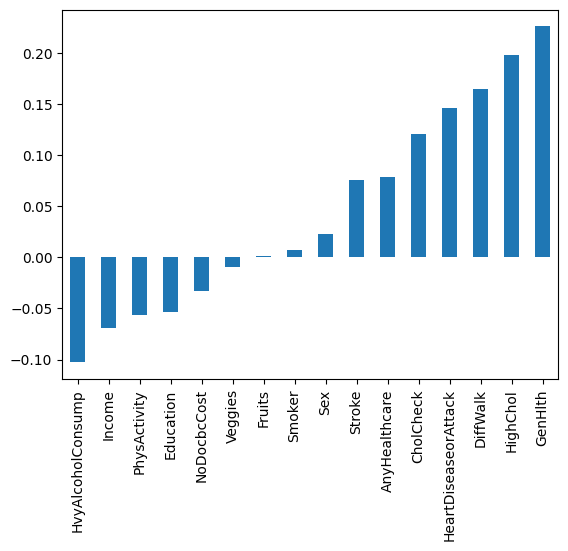

In [ ]:
# Vẽ biểu đồ biểu diễn mối tương quan các biến với Diabetes_012
data1.corr()['Diabetes_012'][:1:-1].sort_values().plot(kind='bar')

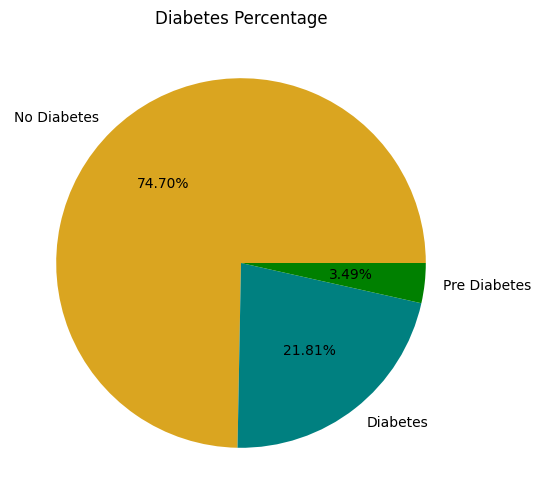

In [ ]:
# Vẽ biểu đồ hình tròn biểu diễn tỉ lệ phần trăm về Diabetes
plt.figure(figsize=(10,6))
plt.pie(data1['Diabetes_012'].value_counts(), labels=['No Diabetes', 'Diabetes','Pre Diabetes'], autopct='%1.2f%%', colors=['goldenrod', 'teal','green'])
plt.title('Diabetes Percentage')
plt.show()

In [ ]:
# Split Diabetics
Diabetics = data1.where(data1.Diabetes_012 == 2)
Diabetics.dropna(inplace=True)

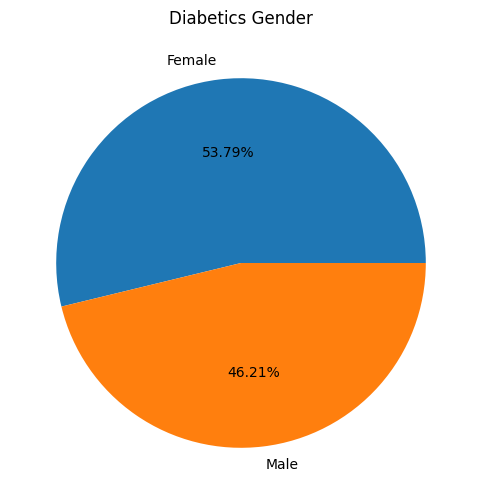

In [ ]:
# Plot pie chart to show sex distribution of Diabetes pations
plt.figure(figsize=(10,6))
plt.pie(Diabetics['Sex'].value_counts(), labels=['Female','Male'] , autopct='%1.2f%%')
plt.title('Diabetics Gender')
plt.show()

Pie chart shows don't have strong relation between Sex and Diabetes

BMI's relation with Diabetes_binary

In [ ]:
data1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education', 'Income', 'Age_Group', 'BMI_Group',
       'MentHlth_Group', 'PhysHlth_Group'],
      dtype='object')

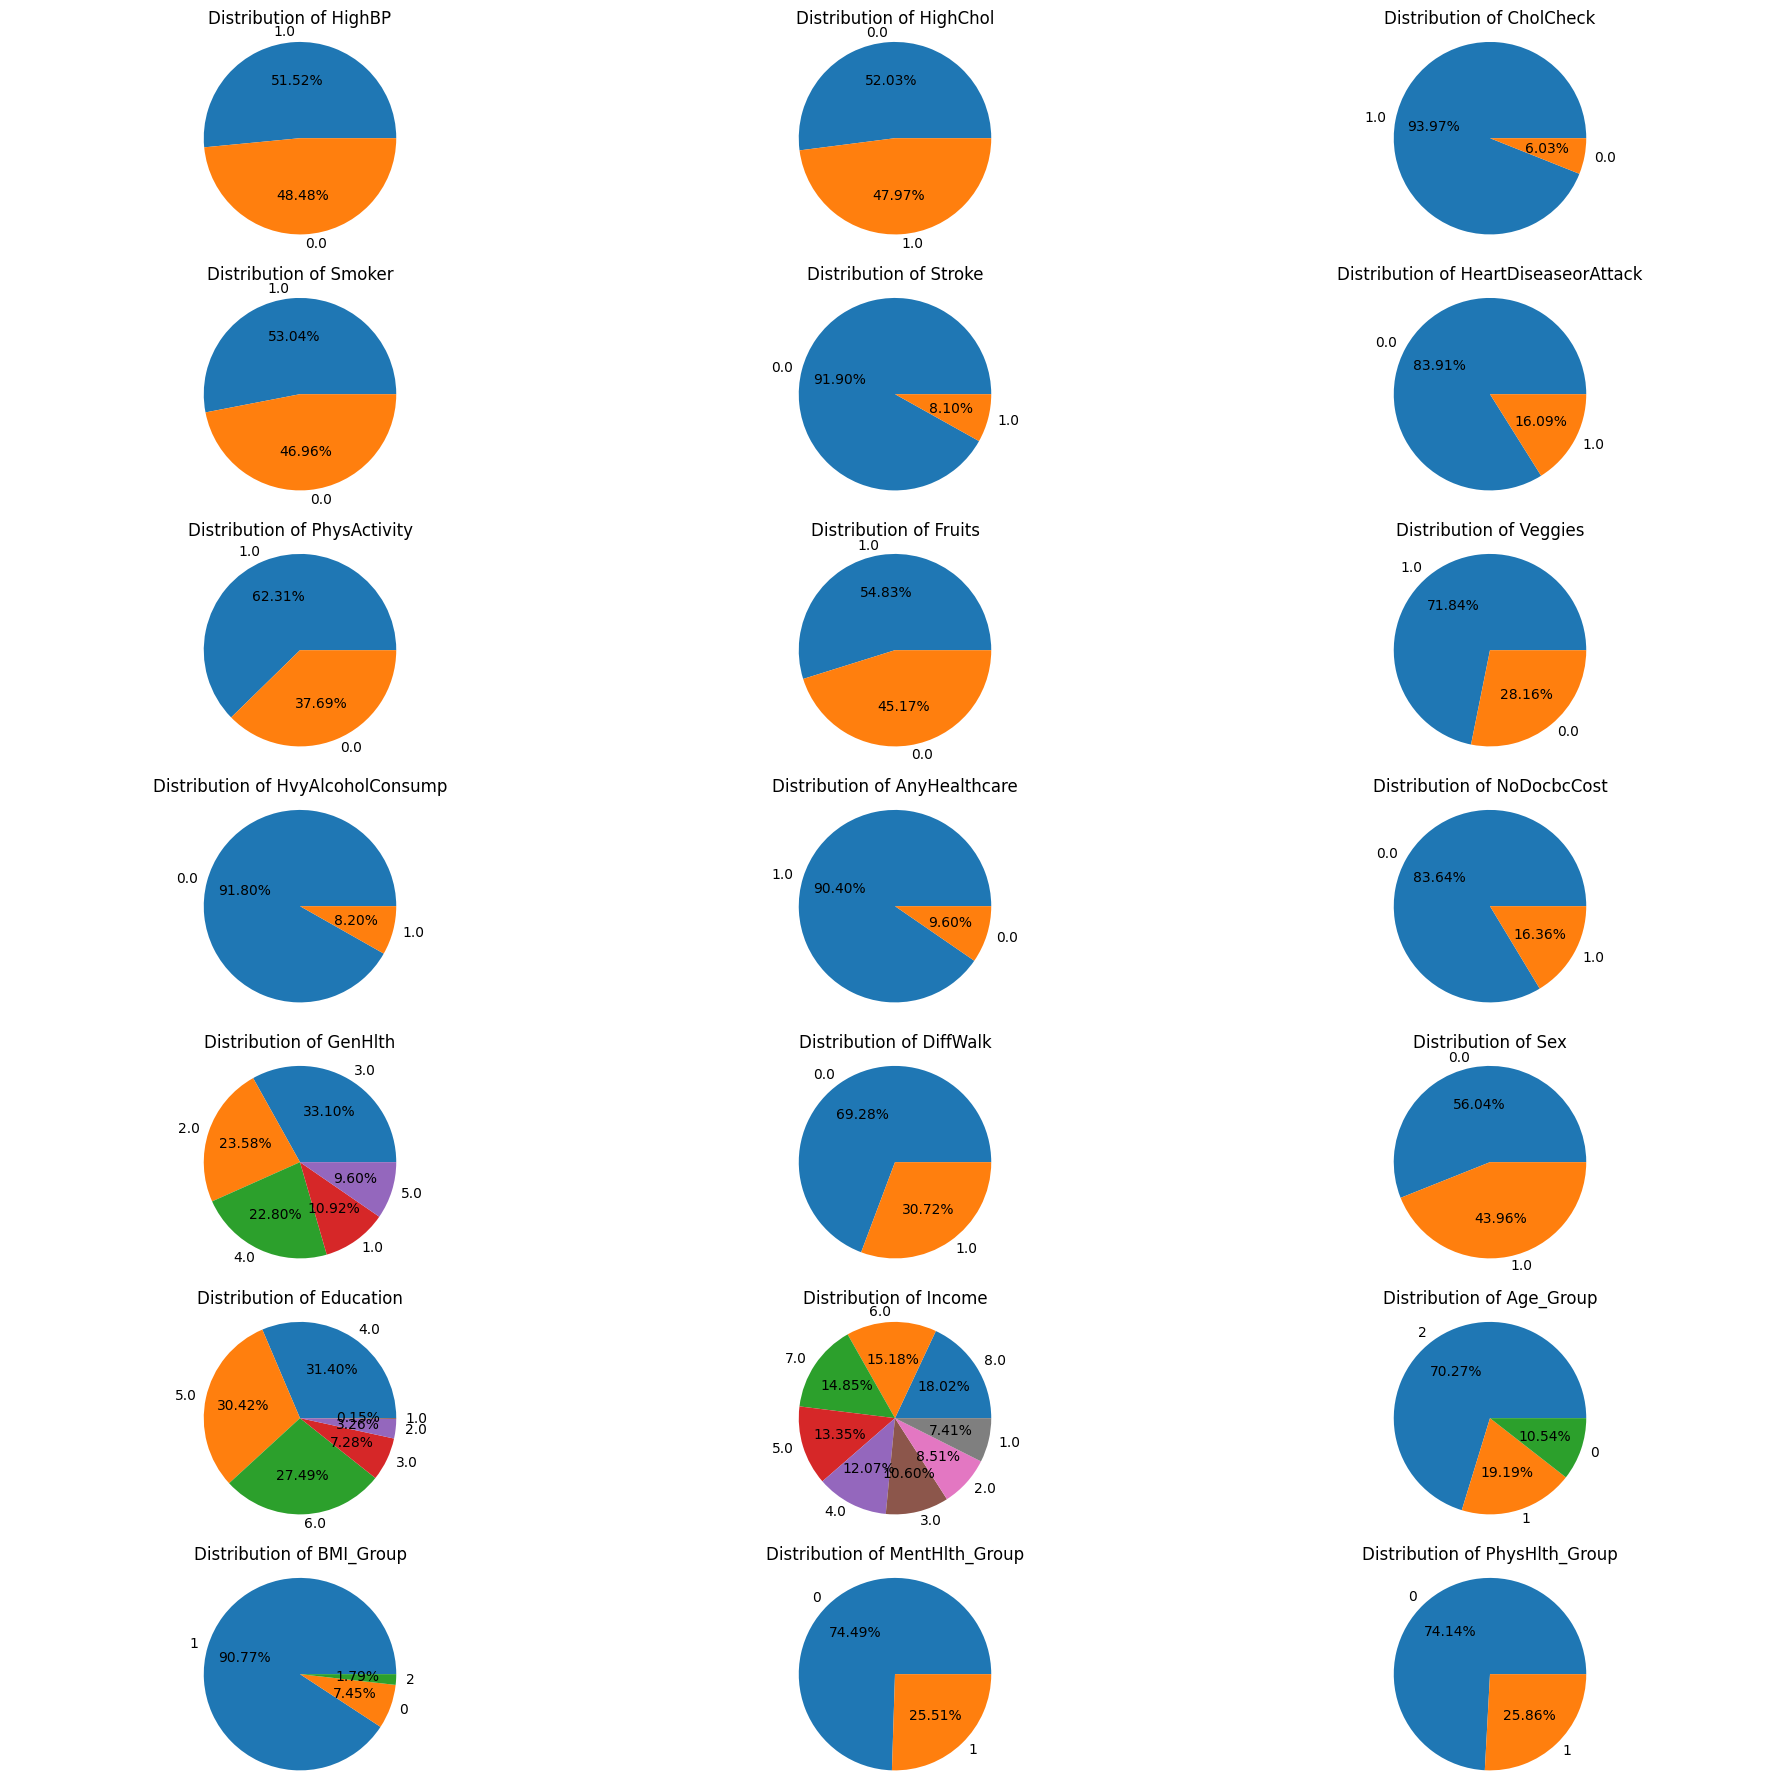

In [ ]:
# Kích thước của biểu đồ
plt.figure(figsize=(18, 18))

# Vòng lặp để vẽ biểu đồ pie cho từng cột thuộc tính
for i, attribute in enumerate(columns_to_plot, 1):
    plt.subplot(7, 3, i)  # Tạo ô biểu đồ cho thuộc tính

    # Tính phân phối của thuộc tính và vẽ biểu đồ pie
    attribute_distribution = data1[attribute].value_counts()
    plt.pie(attribute_distribution, labels=attribute_distribution.index, autopct='%1.2f%%')
    plt.title(f'Distribution of {attribute}')
    plt.axis('equal')  # Đảm bảo biểu đồ pie là hình tròn

# Hiển thị tất cả biểu đồ
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'High Cholesterol in Diabetes pation')

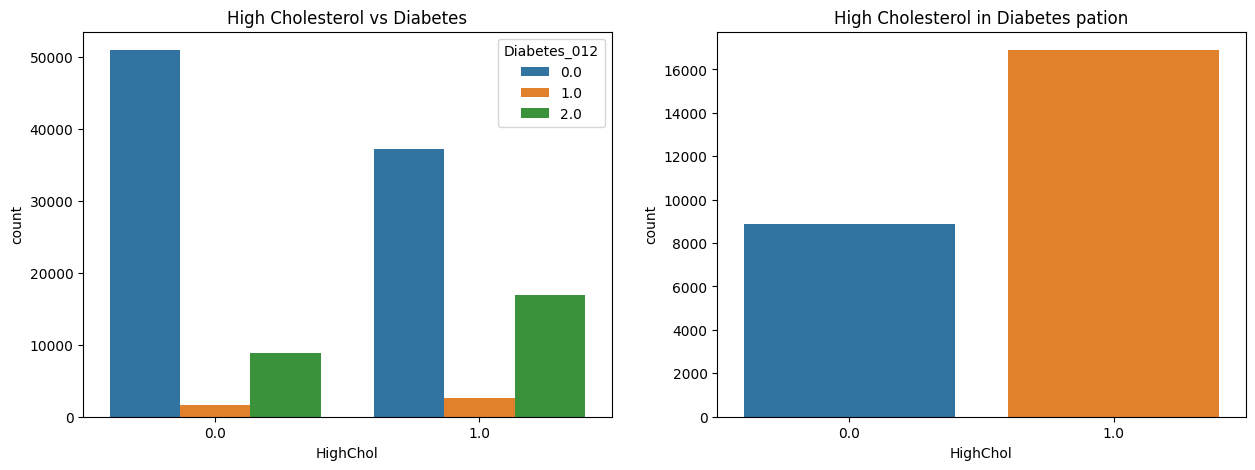

In [ ]:
# HighChol and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighChol', data=data1, hue='Diabetes_012', ax=ax[0]).set_title('High Cholesterol vs Diabetes')
sns.countplot(x='HighChol', data=Diabetics, ax=ax[1]).set_title('High Cholesterol in Diabetes pation')

In [ ]:
Diabetics['HighChol'].value_counts().sort_values(ascending=False)

1.0    16894
0.0     8861
Name: HighChol, dtype: int64

Biểu đồ cho thấy mối liên quan giữa Cholesterol cao và Bệnh tiểu đường. Bệnh nhân tiểu đường (có HighChol : 23496 , không có HighChol : 11601)

Text(0.5, 1.0, 'Difficulty in walking or climbing in Diabetes pation')

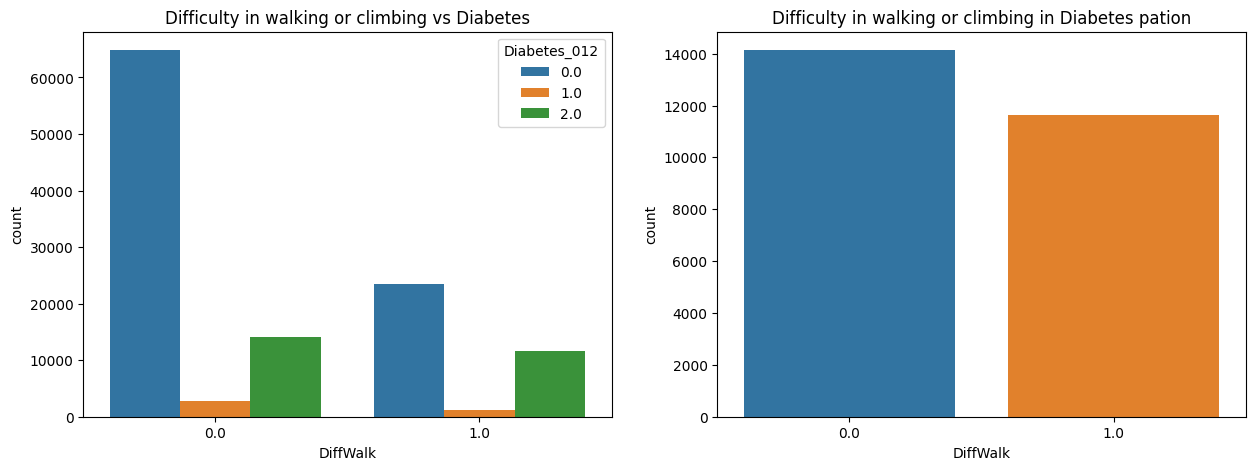

In [ ]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='DiffWalk', data=data1, hue='Diabetes_012', ax=ax[0]).set_title('Difficulty in walking or climbing vs Diabetes')
sns.countplot(x='DiffWalk', data=Diabetics, ax=ax[1]).set_title('Difficulty in walking or climbing in Diabetes pation')

Dữ liệu cho thấy những người bị bệnh tiểu đường có xu hướng đi bộ gặp khó khăn

In [ ]:
Diabetics['DiffWalk'].value_counts().sort_values(ascending=False)

0.0    14138
1.0    11617
Name: DiffWalk, dtype: int64

Text(0.5, 1.0, 'High blood pressure in Diabetes pation')

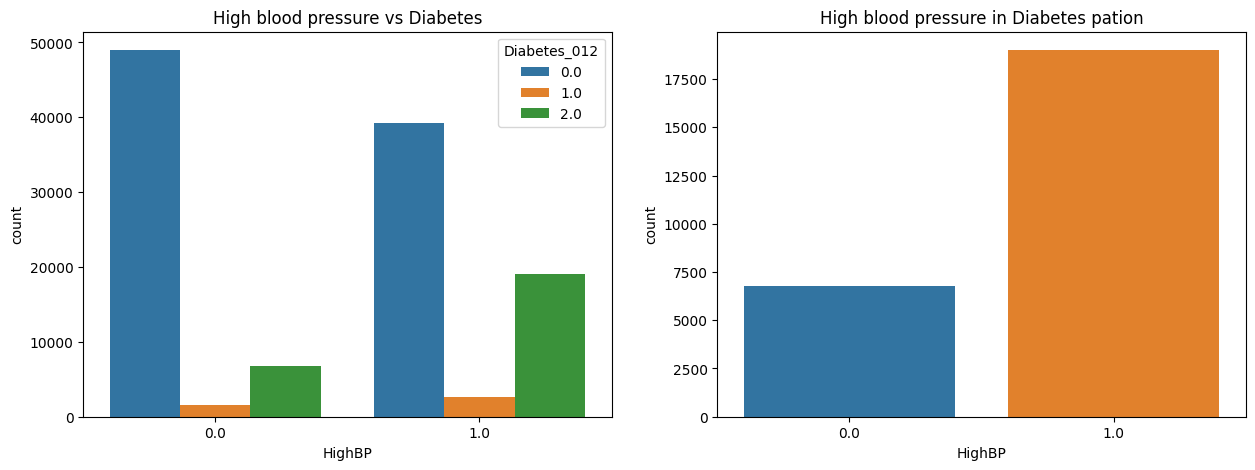

In [ ]:
# HighBP and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighBP', data=data1, hue='Diabetes_012', ax=ax[0]).set_title('High blood pressure vs Diabetes')
sns.countplot(x='HighBP', data=Diabetics, ax=ax[1]).set_title('High blood pressure in Diabetes pation')

Countplot shows have relation between the High blood pressure and Diabetes. Diabetics

In [ ]:
Diabetics['HighBP'].value_counts().sort_values(ascending=False)

1.0    19005
0.0     6750
Name: HighBP, dtype: int64

Text(0.5, 0, 'GenHlth | 1:excellent 2:very good 3:good 4:fair 5:poor')

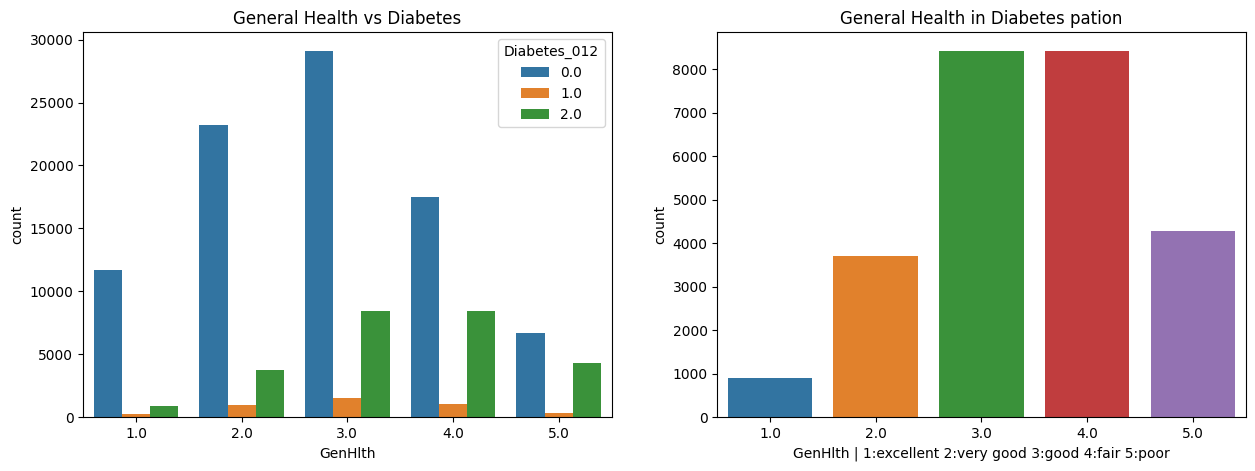

In [ ]:
# GenHlth and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GenHlth', data=data1, hue='Diabetes_012', ax=ax[0]).set_title('General Health vs Diabetes')
sns.countplot(x='GenHlth', data=Diabetics, ax=ax[1]).set_title('General Health in Diabetes pation')
plt.xlabel('GenHlth | 1:excellent 2:very good 3:good 4:fair 5:poor')

Both the Countplotsprovides clear understanding of the realtion between the General Health and diabetes. In good, fair, poor health type there is a high risk of developing diabetes


In [ ]:
Diabetics['GenHlth'].value_counts().sort_values(ascending=False)

3.0    8433
4.0    8424
5.0    4277
2.0    3715
1.0     906
Name: GenHlth, dtype: int64

checking HighBP and HighChol's combined effect on Diabetes

In [ ]:
(data1.groupby(["HighBP" , "HighChol"])["Diabetes_012"].value_counts()/data1.groupby(["HighBP" , "HighChol"])["Diabetes_012"].count())*100

HighBP  HighChol  Diabetes_012
0.0     0.0       0.0             89.118254
                  2.0              8.846948
                  1.0              2.034798
        1.0       0.0             78.822940
                  2.0             17.280240
                  1.0              3.896819
1.0     0.0       0.0             73.567169
                  2.0             23.028822
                  1.0              3.404009
        1.0       0.0             58.550409
                  2.0             36.632153
                  1.0              4.817439
Name: Diabetes_012, dtype: float64

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

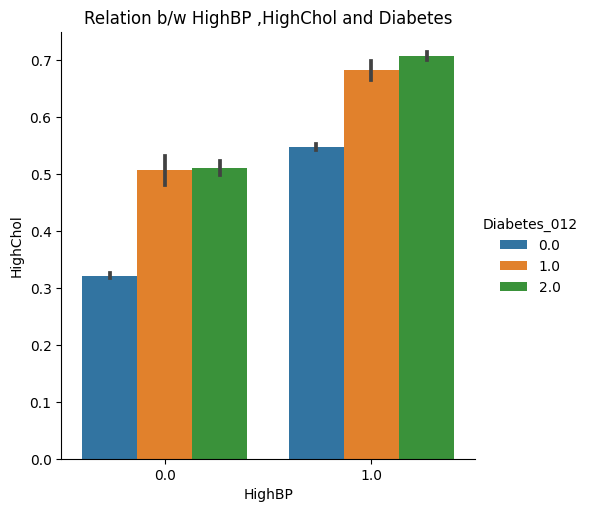

In [ ]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data1 , hue="Diabetes_012" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

Theo dữ liệu này, cả HighBP và HighChol đều làm tăng nguy cơ mắc bệnh tiểu đường.

# **Model Training**

### Data

In [9]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [10]:
data2 = data.copy()

In [11]:
data2.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Age_Group', 'BMI_Group', 'MentHlth_Group', 'PhysHlth_Group'],
      dtype='object')

In [12]:
# Hiển thị số lượng các lớp chính
data2['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [13]:
# columns_to_drop = ['BMI', 'PhysHlth','MentHlth','Age']

In [14]:
columns_to_drop = ['Age_Group', 'BMI_Group','MentHlth_Group', 'PhysHlth_Group']

In [15]:
data2 = data2.drop(columns=columns_to_drop, axis=1)

In [16]:
# Xóa các dong dữ liệu trùng lăp
data2.drop_duplicates(inplace = True)
data2.shape

(229781, 22)

In [17]:
# Tách lớp dữ liệu
X = data2.drop('Diabetes_012', axis=1)
y = data2['Diabetes_012']

In [ ]:
# from imblearn.combine import SMOTEENN
# sm = SMOTEENN()
# X_resampled, y_resampled = sm.fit_resample(X,y)

In [ ]:
# X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Sau khi xử lý dữ liệu ta sử dụng việc chuẩn hóa dữ liệu
Mã bạn đưa ra sử dụng StandardScaler
Loại bỏ biểu đồ tỷ lệ: Chuẩn hóa đảm bảo rằng tất cả các biến đều có cùng một tỷ lệ.Giảm ảnh hưởng của nhiễu


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [19]:
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features,columns=data2.columns[1:])

Sau khi phân tích và xử lý dữ liệu ta thấy sự chênh lệch giữa các đặc trưng của lớp là khá lơn , nên ta sử dụng RandomOverSampler Để có thể tạo thêm dữ liệu cho các thuộc tính bị thiêu , Để giúp thuật toán trở lên trực quan hơn

In [20]:
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)
# Membagi data menjadi train set dan validation set
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# from imblearn.under_sampling import NearMiss
# nm = NearMiss(version = 1 , n_neighbors = 10)

# x_sm,y_sm= nm.fit_resample(X,y)

 giảm mất cân bằng giữa các lớp bằng cách loại bỏ một phần mẫu từ lớp thiểu số (minority class)

In [ ]:
# X_train_nm , X_test_nm , y_train_nm , y_test_nm = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)

In [ ]:
# # Tạo một đối tượng StandardScaler
# scaler = StandardScaler()

# # Phù hợp và biến đổi dữ liệu huấn luyện
# X_train_scaled = scaler.fit_transform(X_train_r)

# # Biến đổi dữ liệu kiểm tra (sử dụng giá trị trung bình và độ lệch chuẩn của tập huấn luyện)
# X_test_scaled = scaler.transform(X_test_r)

In [ ]:
# Đọc dữ liệu từ gg drive
# df_test = pd.read_csv('/content/drive/MyDrive/Data_Mining/new_data_test.csv')

In [21]:
df_test = df.copy()

In [ ]:
# df_test.head()

In [ ]:
# df_test.info()

In [ ]:
# columns_to_drop = ['BMI', 'PhysHlth','MentHlth','Age']

In [ ]:
# df_test = df_test.drop(columns=columns_to_drop, axis=1)

In [22]:
# Tách lớp dữ liệu
X_new = df_test.drop('Diabetes_012', axis=1)
y_new = df_test['Diabetes_012']

In [23]:
X_new.shape

(253680, 21)

In [24]:
X.shape

(229781, 21)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_new)

StandardScaler()

In [26]:
scaled_features = scaler.transform(X_new)
X_new = pd.DataFrame(scaled_features,columns=df_test.columns[1:])

### Logistic Regression

H(x) = 1 / (1 + e^(-θx))

Trong đó:

H(x) là xác suất dự đoán rơi vào lớp 1.
θ (theta) là vectơ trọng số (weights) của mô hình.
x là vectơ đặc trưng của mẫu dữ liệu.

In [ ]:
# Khởi tạo mô hình Logistic Regression
lr = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
lr.fit(X_train_o, y_train_o)

LogisticRegression()

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_lr = lr.predict(X_test_o)

# Tính độ chính xác
accuracy = accuracy_score(y_test_o, y_pred_lr)
print("Độ chính xác: {:.2f}%".format(accuracy * 100))

Độ chính xác: 50.97%


In [ ]:
# Kết quả của tập huấn luyện và tập kiểm thử
print('Training set score: {:.4f}'.format(lr.score(X_train_o, y_train_o)))

print('Test set score: {:.4f}'.format(lr.score(X_test_o, y_test_o)))

Training set score: 0.5122
Test set score: 0.5097


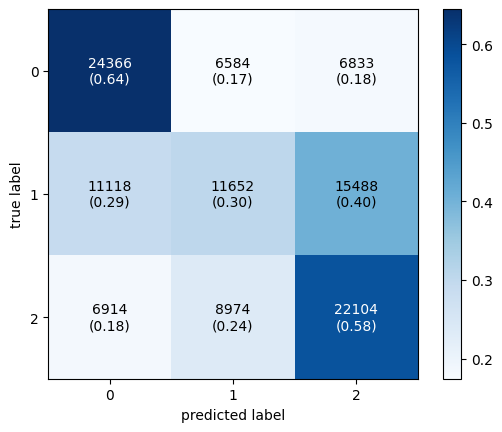

In [ ]:
# Tính toán và vẽ ma trận nhầm lẫn
cm1 = confusion_matrix(y_test_o,y_pred_lr)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_new)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(X_new)
X_new = pd.DataFrame(scaled_features,columns=df_test.columns[1:])

In [ ]:
# Dự đoán kết quả trên dữ liệu mới
y_pred = lr.predict(X_new)

# In ra các giá trị dự đoán
print("Kết quả dự đoán:")
print(y_pred)

Kết quả dự đoán:
[2. 0. 1. 0. 1. 0. 0. 1. 2. 0. 0. 2. 0. 2. 1. 0. 1. 0. 0. 0. 2. 2. 0. 0.
 1. 0. 2. 2. 2. 0. 2. 1. 0. 2. 1. 0. 2. 0. 0. 2. 0. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 2. 0. 2. 0. 0. 0. 0. 0. 2. 0. 1. 2. 1. 1. 1. 2. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 2. 1. 0. 0. 2. 2. 1. 0. 2. 0. 2. 0. 2. 2. 0. 1. 1. 0. 2.
 0. 2. 1. 1. 2. 2. 2. 1. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 2. 0. 0.
 0. 0. 2. 2. 1. 1. 0. 1. 0. 0. 2. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 2. 1. 0. 0. 0. 1. 2. 0. 0. 0. 1. 2. 0. 0. 2. 0. 1. 0. 0. 0. 2. 0.
 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 2.
 2. 2. 2. 0. 2. 2. 0. 0. 1.]


In [ ]:
# So sánh với kết quả thực tế
accuracy = accuracy_score(y_new, y_pred)
print(f"Độ chính xác: {accuracy:.2f}")

Độ chính xác: 0.63


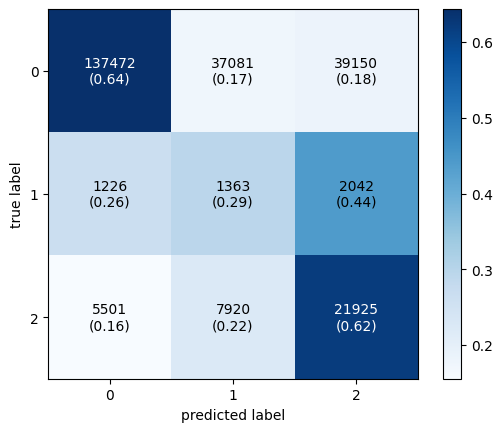

In [ ]:
# Tính toán và vẽ ma trận nhầm lẫn
cm1 = confusion_matrix(y_new,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
# So sánh với kết quả thực tế
accuracy = accuracy_score(y_new, y_pred)
print(f"Độ chính xác: {accuracy:.2f}")

Độ chính xác: 0.57


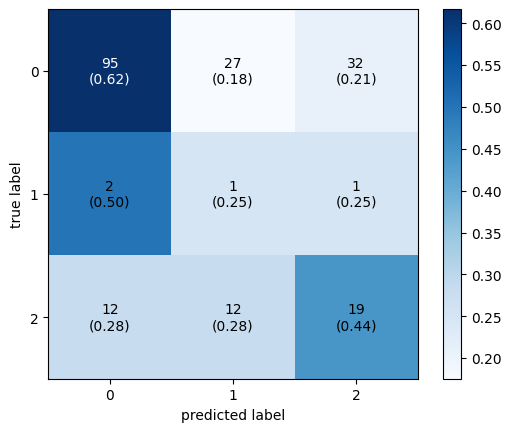

In [ ]:
# Tính toán và vẽ ma trận nhầm lẫn
cm1 = confusion_matrix(y_new,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Decision Tree Classifier

The optimal depth for the decision tree is 44


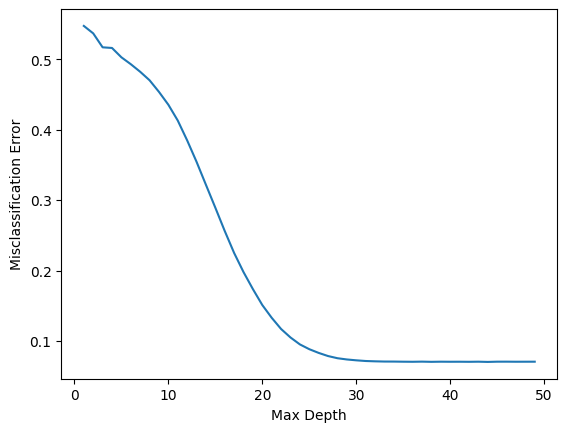

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming X_train, X_test, Y_train, Y_test are defined

# defining the values of max_depth to be tested
depths = list(range(1, 50))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt, X_train_o, y_train_o, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best max_depth
optimal_depth = depths[MSE.index(min(MSE))]
print("The optimal depth for the decision tree is %d" % optimal_depth)

# plot misclassification error vs max_depth
plt.plot(depths, MSE)
plt.xlabel('Max Depth')
plt.ylabel('Misclassification Error')
plt.show()

In [27]:
# Reinitialize the classifier with the optimal max_depth
dt = DecisionTreeClassifier(max_depth=25)
dt.fit(X_train_o, y_train_o)

# make predictions on test set
y_pred = dt.predict(X_test_o)

print('Training set score: {:.4f}'.format(dt.score(X_train_o, y_train_o)))
print('Test set score: {:.4f}'.format(dt.score(X_test_o, y_test_o)))


Training set score: 0.9725
Test set score: 0.9170


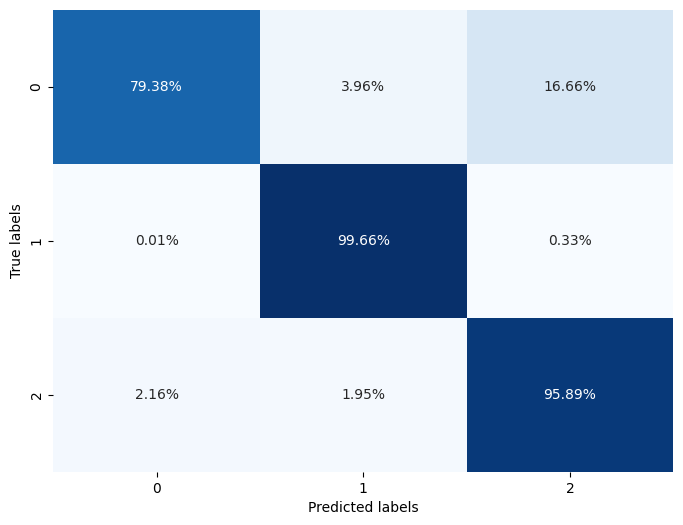

In [ ]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test_o, y_pred)
cm_percentage = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] # convert to percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)  # displaying as percentages with two decimal points, without the color bar
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
# Dự đoán kết quả trên dữ liệu mới
y_pred = dt.predict(X_new)

# In ra các giá trị dự đoán
print("Kết quả dự đoán:")
print(y_pred)

Kết quả dự đoán:
[0. 0. 0. ... 0. 0. 2.]


In [ ]:
# So sánh với kết quả thực tế
accuracy = accuracy_score(y_new, y_pred)
print(f"Độ chính xác: {accuracy:.2f}")

Độ chính xác: 0.90


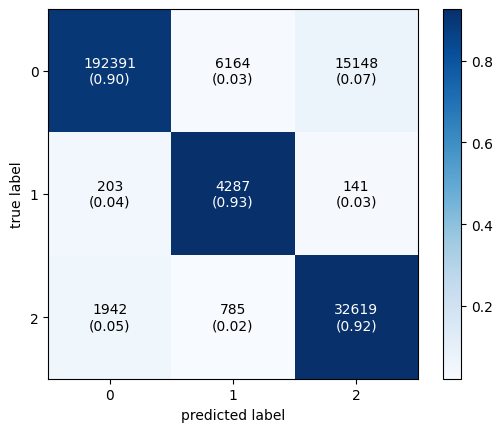

In [ ]:
# Tính toán và vẽ ma trận nhầm lẫn
cm1 = confusion_matrix(y_new,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


In [45]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_o, y_train_o)


DecisionTreeClassifier(max_depth=5)

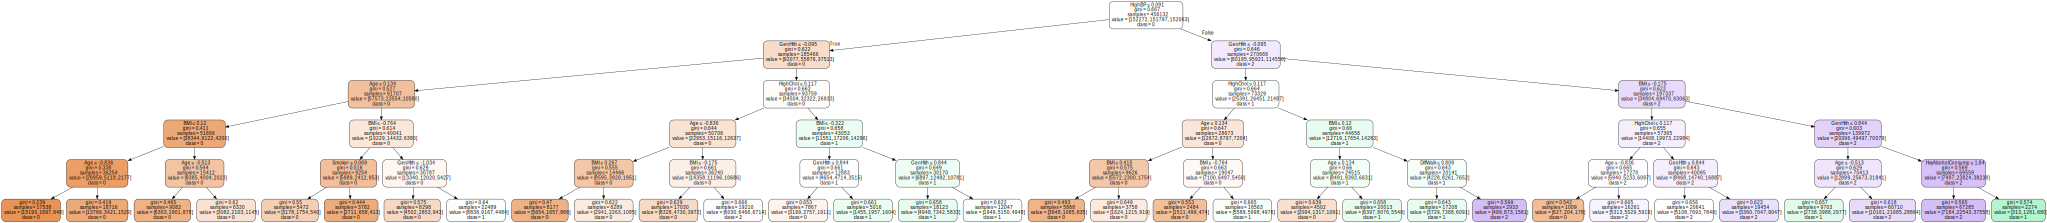

In [46]:
Y_name = ['0','1','2']
dot_data = export_graphviz(dt, out_file=None,
                         feature_names=X_train_o.columns,
                         class_names=Y_name,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph

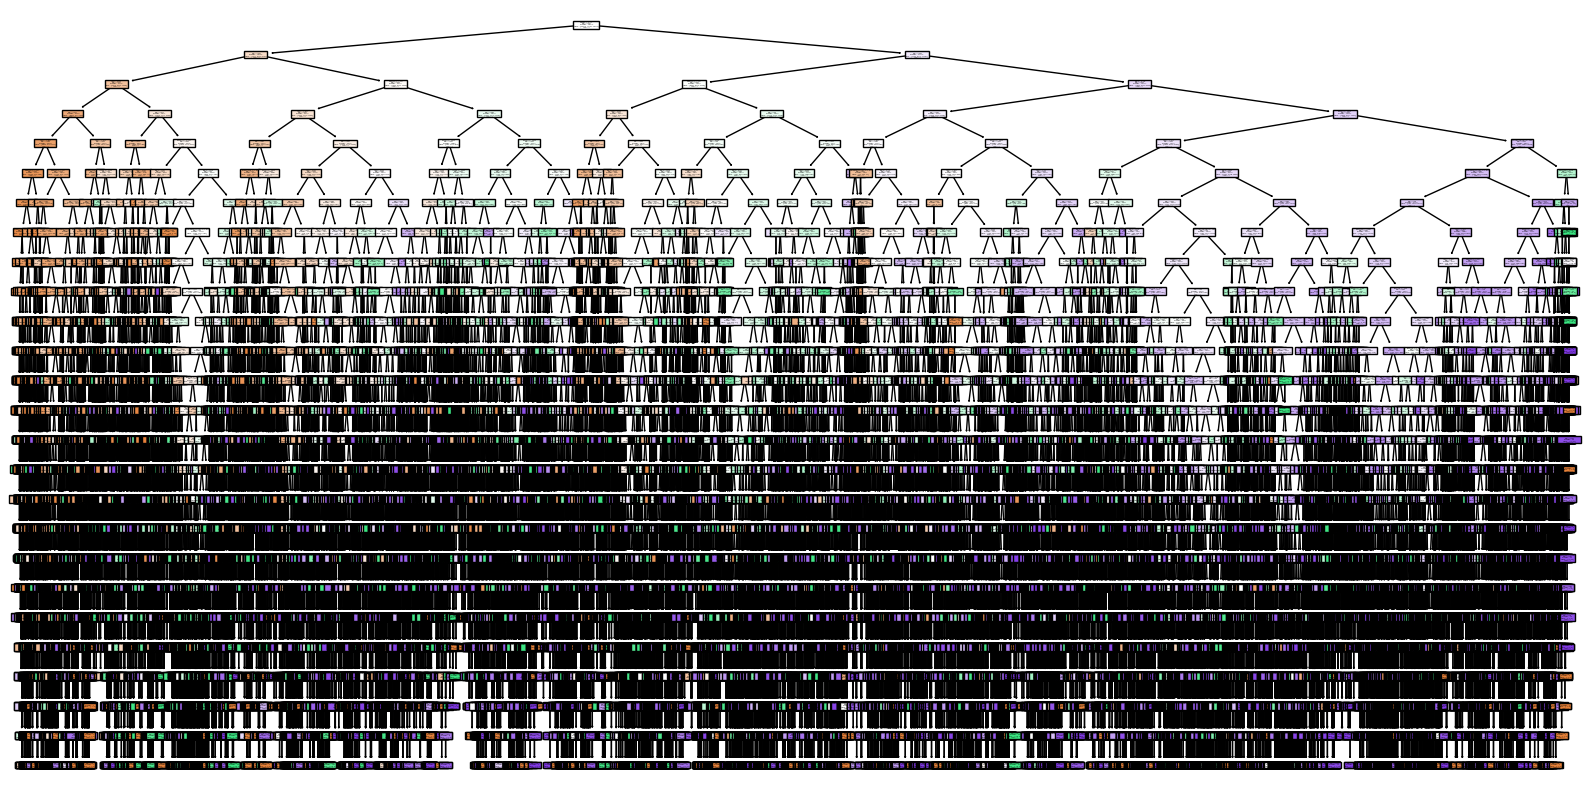

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Khởi tạo và huấn luyện mô hình Decision Tree
dt = DecisionTreeClassifier(max_depth=25)
dt.fit(X_train_o, y_train_o)

# Vẽ cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X_train_o.columns, class_names=['0', '1','2'])
plt.show()



### K Nearest Neighbors

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
# Reinitialize the classifier with the optimal number of neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_o, y_train_o)


KNeighborsClassifier(n_neighbors=10)

Training set score: 0.8512
Test set score: 0.8168


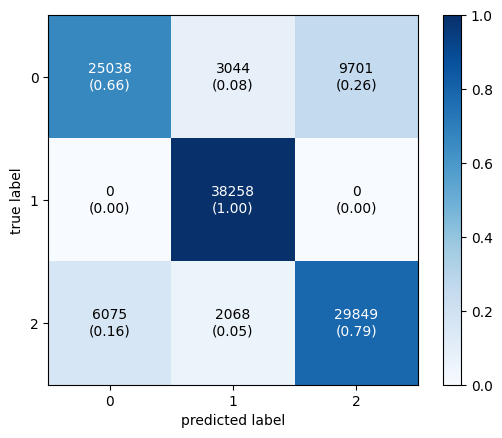

In [ ]:

# make predictions on test set
y_pred = knn.predict(X_test_o)

print('Training set score: {:.4f}'.format(knn.score(X_train_o, y_train_o)))
print('Test set score: {:.4f}'.format(knn.score(X_test_o, y_test_o)))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test_o, y_pred)
plot_confusion_matrix(conf_mat=cm1, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()


In [ ]:
# Dự đoán kết quả trên dữ liệu mới
y_pred = knn.predict(X_new)

# In ra các giá trị dự đoán
print("Kết quả dự đoán:")
print(y_pred)

Kết quả dự đoán:
[2. 0. 1. ... 0. 0. 2.]


In [ ]:
# So sánh với kết quả thực tế
accuracy = accuracy_score(y_new, y_pred)
print(f"Độ chính xác: {accuracy:.2f}")

Độ chính xác: 0.72


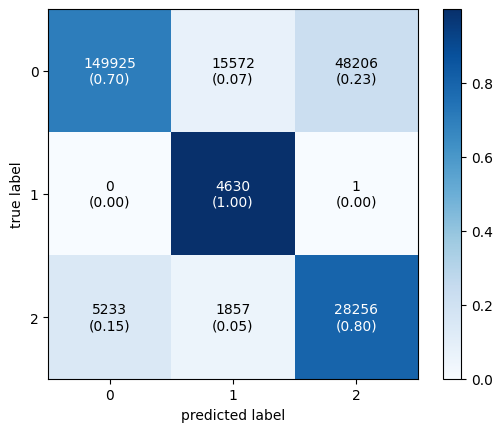

In [ ]:
# Tính toán và vẽ ma trận nhầm lẫn
cm1 = confusion_matrix(y_new,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

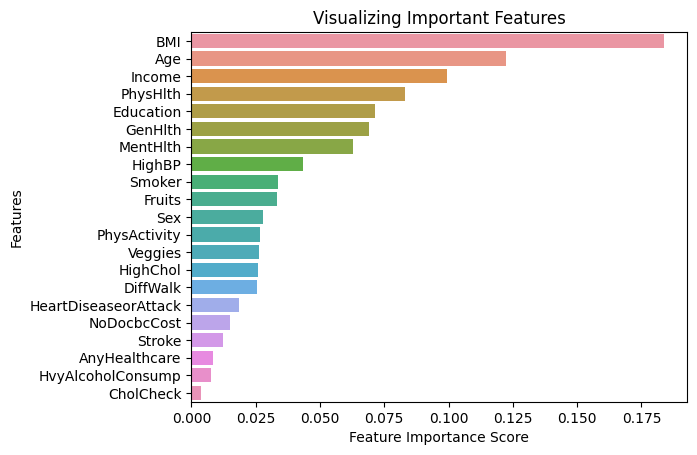

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# Train a Random Forest model (assuming clf is your trained model)
clf.fit(X_train_o, y_train_o)

# Get feature importances from the model
feature_imp = clf.feature_importances_

# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train_o.columns, 'Importance': feature_imp})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


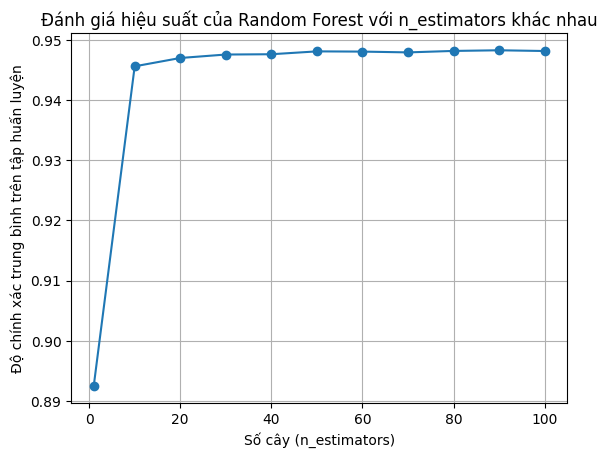

In [ ]:
# Danh sách các giá trị n_estimators bạn muốn kiểm tra
n_estimators_values = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# List để lưu kết quả độ chính xác
accuracies = []

# Duyệt qua từng giá trị n_estimators
for n_estimators in n_estimators_values:
    # Tạo mô hình Random Forest với n_estimators cụ thể
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Thực hiện cross-validation với 5 folds và tính độ chính xác trung bình
    scores = cross_val_score(rf, X_train_o, y_train_o, cv=5, scoring='accuracy')
    accuracy = np.mean(scores)

    accuracies.append(accuracy)

# Vẽ biểu đồ để hiển thị kết quả
plt.plot(n_estimators_values, accuracies, marker='o')
plt.xlabel('Số cây (n_estimators)')
plt.ylabel('Độ chính xác trung bình trên tập huấn luyện')
plt.title('Đánh giá hiệu suất của Random Forest với n_estimators khác nhau')
plt.grid(True)
plt.show()

In [ ]:
rf =RandomForestClassifier(n_estimators=10)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train_o,y_train_o)

RandomForestClassifier(n_estimators=10)

In [ ]:
# Make predictions on test set
y_pred_rf =rf.predict(X_test_o)

In [ ]:
print('Training set score: {:.4f}'.format(rf.score(X_train_o, y_train_o)))

print('Test set score: {:.4f}'.format(rf.score(X_test_o, y_test_o)))

Training set score: 0.9954
Test set score: 0.9575


In [ ]:
#check MSE & RMSE
mse =mean_squared_error(y_test_o, y_pred_rf)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(y_test_o, y_pred_rf))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.16232143326931678
Root Mean Squared Error : 0.4028913417651424


In [ ]:
matrix = classification_report(y_test_o,y_pred_rf )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93     37783
         1.0       0.99      1.00      1.00     38258
         2.0       0.90      0.99      0.94     37992

    accuracy                           0.96    114033
   macro avg       0.96      0.96      0.96    114033
weighted avg       0.96      0.96      0.96    114033



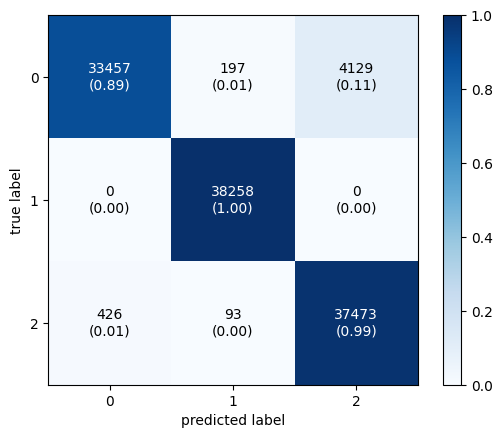

In [ ]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test_o,y_pred_rf)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
# Dự đoán kết quả trên dữ liệu mới
y_pred = rf.predict(X_new)

# In ra các giá trị dự đoán
print("Kết quả dự đoán:")
print(y_pred)

Kết quả dự đoán:
[0. 0. 0. ... 0. 0. 2.]


In [ ]:
# So sánh với kết quả thực tế
accuracy = accuracy_score(y_new, y_pred)
print(f"Độ chính xác: {accuracy:.2f}")

Độ chính xác: 0.96


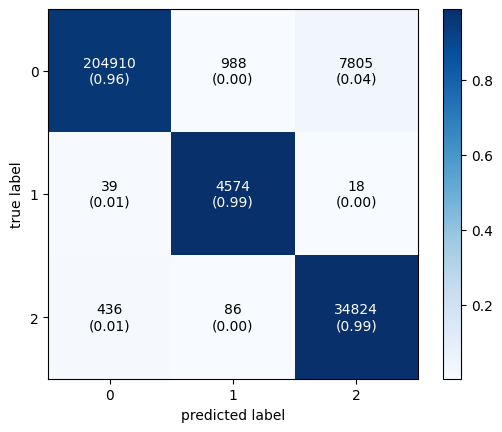

In [ ]:
# Tính toán và vẽ ma trận nhầm lẫn
cm1 = confusion_matrix(y_new,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Comparing the models

In [ ]:
# Make predictions with each model
lr_pred = lr.predict(X_test_o)
dt_pred = dt.predict(X_test_o)
knn_pred = knn.predict(X_test_o)
rf_pred = rf.predict(X_test_o)


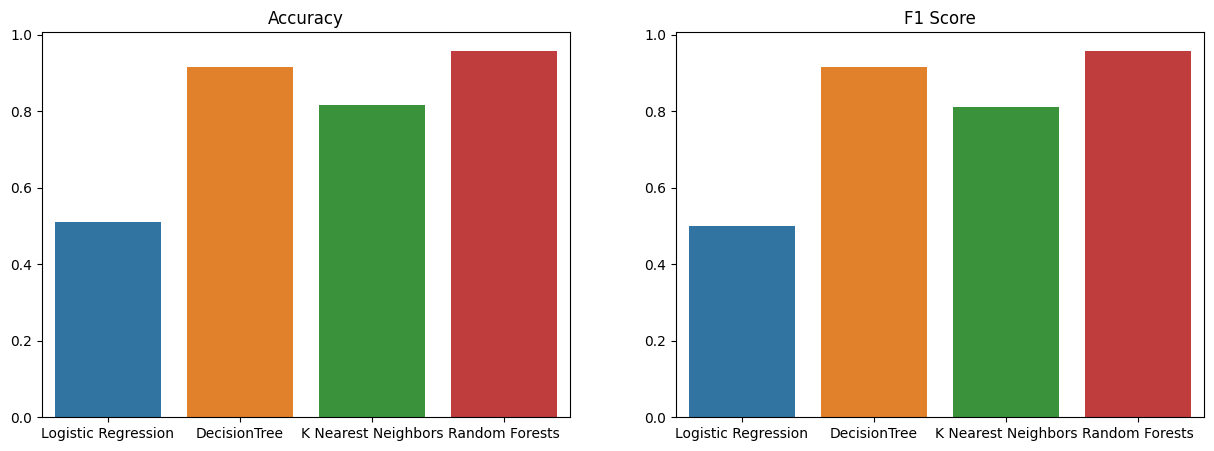

In [ ]:
# Comparing the accuracy of different models
models = ['Logistic Regression', 'DecisionTree', 'K Nearest Neighbors', 'Random Forests']
preds = [lr_pred, dt_pred, knn_pred, rf_pred]
accuracies = []
f1_scores = []

for i in preds:
    accuracies.append(accuracy_score(y_test_o, i))
    f1_scores.append(f1_score(y_test_o, i, average="weighted"))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=models, y=accuracies, ax=ax[0]).set_title('Accuracy')
sns.barplot(x=models, y=f1_scores, ax=ax[1]).set_title('F1 Score')

plt.show()

In [ ]:
! pip install -q git+https://github.com/pycaret/pycaret.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.classification import *

In [ ]:
# Setup
setup_de_classificacao = setup(data=df, target='Diabetes_012')

,Description,Value
0,Session id,483
1,Target,Diabetes_012
2,Target type,Multiclass
3,Original data shape,"(253680, 22)"
4,Transformed data shape,"(253680, 22)"
5,Transformed train set shape,"(177576, 22)"
6,Transformed test set shape,"(76104, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple
